In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 모듈 불러오는 코드

import re
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 글자 깨짐 방지 코드

from matplotlib import font_manager, rc
import matplotlib
import platform
import matplotlib.pyplot as plt

%matplotlib inline


if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family = font_name)
else:
    rc('font',family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus']=False
%matplotlib inline

In [13]:
!apt-get install -y fonts-nanum*
!rm -rf /root/.cache/matplotlib/* # 폰트 캐시 재설정

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20200506-1).
The following NEW packages will be installed:
  fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 35.7 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-coding all 2.5-3 [4,988 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-eco all 1.000-7 [14.7 MB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0 MB]
Fetched 35.7 MB in 3s (11.8 MB/s)
Selecting prev

# (Train 데이터) EDA

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
ROOT_DIR = '/content/drive/MyDrive/BDA 공모전/'

In [5]:
data = pd.read_csv(ROOT_DIR + 'tmk_bda_train.csv')

In [6]:
# 데이터 형태 확인
data.head()

,Unnamed: 0,scd,product_name,net_order_qty,net_order_amt,gender,age_grp,employee_yn,order_date,prime_yn
0,0,20230124153976,잔칫집 식혜 240ml 30입,1,9.803170,F,2,Y,20230124,N
1,1,20230124155563,백설 한입쏙 비엔나 120g*2,1,8.256607,M,3,Y,20230124,N
2,2,20230125158386,비비고 왕교자 1.05kg,1,9.348449,F,4,N,20230125,N
3,3,20230126164638,고메 바삭쫄깃한 탕수육 900g,1,9.667259,F,4,N,20230126,Y
4,4,20230125159705,햇반 매일잡곡밥210g,20,9.994653,M,4,N,20230125,Y


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45875 entries, 0 to 45874
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     45875 non-null  int64  
 1   scd            45875 non-null  int64  
 2   product_name   45875 non-null  object 
 3   net_order_qty  45875 non-null  int64  
 4   net_order_amt  45875 non-null  float64
 5   gender         45875 non-null  object 
 6   age_grp        45875 non-null  int64  
 7   employee_yn    45875 non-null  object 
 8   order_date     45875 non-null  int64  
 9   prime_yn       45875 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 3.5+ MB


In [8]:
data.nunique()

Unnamed: 0       45875
scd              10653
product_name      3113
net_order_qty       54
net_order_amt    11593
gender               2
age_grp              6
employee_yn          2
order_date          31
prime_yn             2
dtype: int64

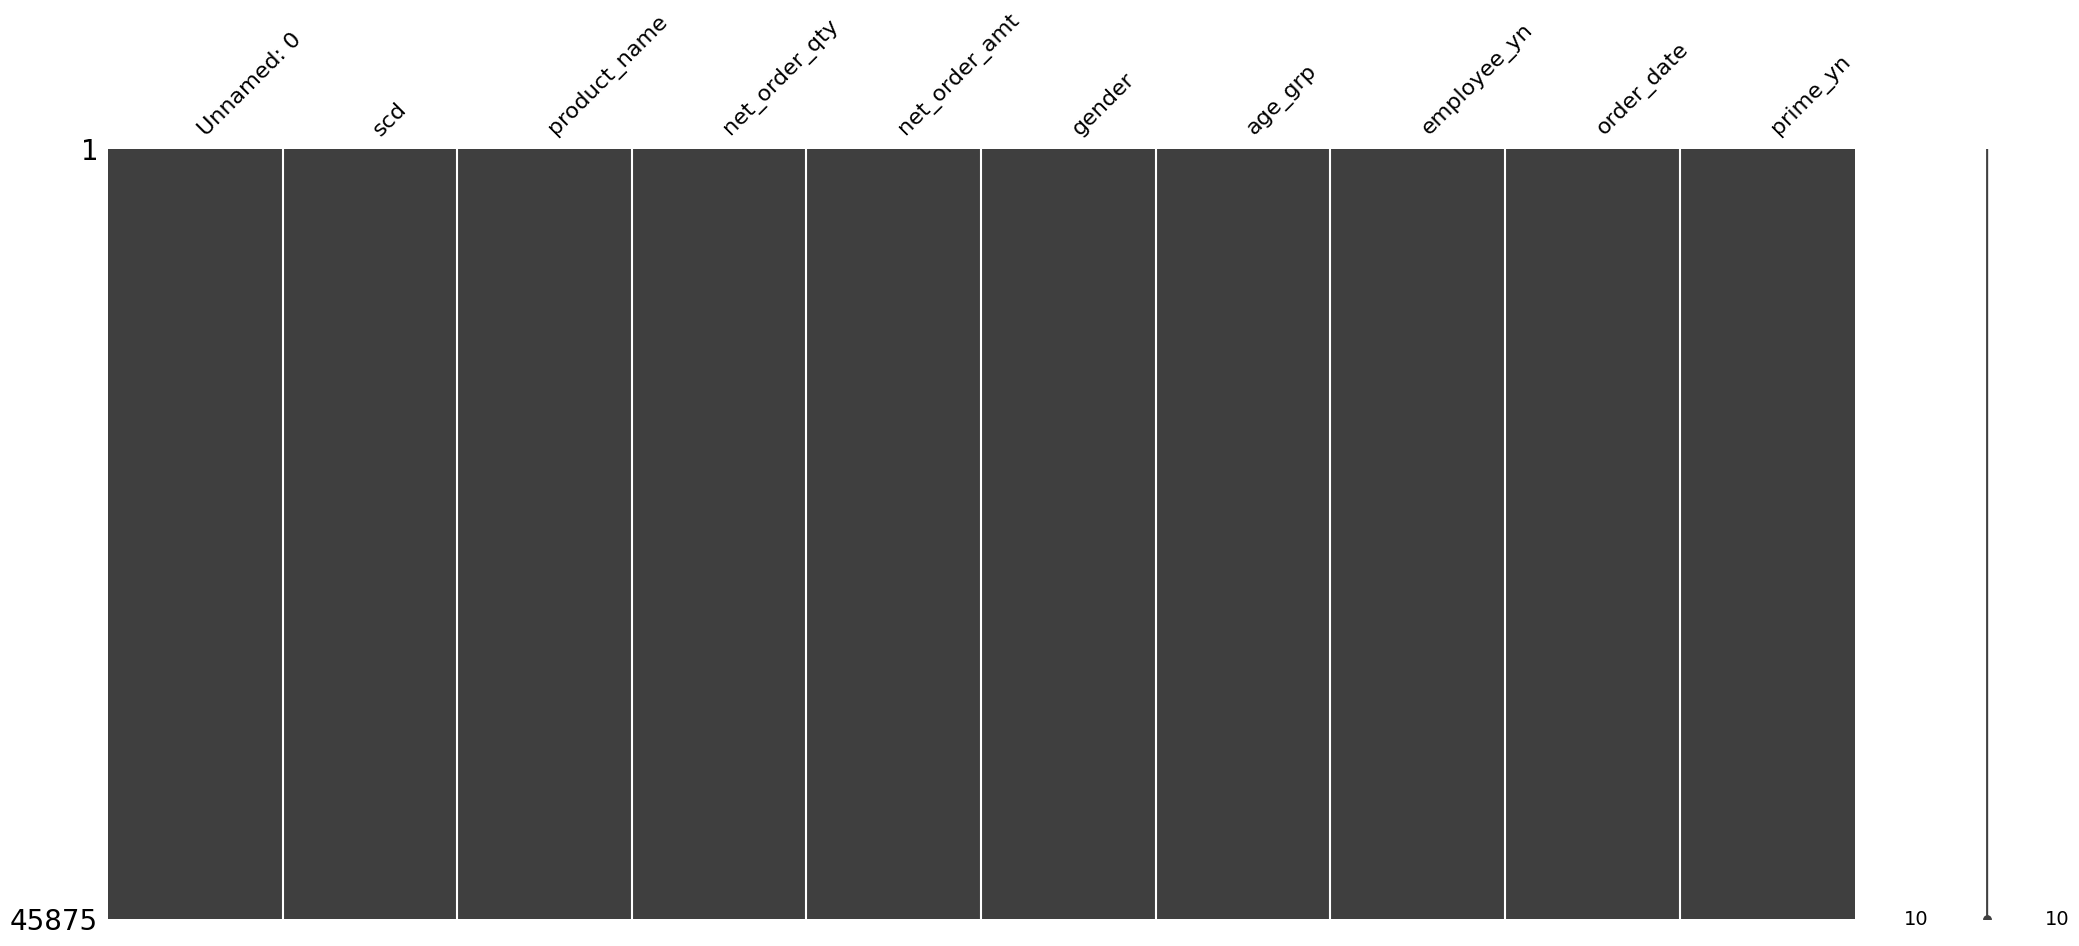

In [9]:
# 데이터에 결측치가 있는지 확인
import missingno as msno

msno.matrix(data)
plt.show()

In [10]:
# 데이터 통계량 분석
data.describe(include='all')

,Unnamed: 0,scd,product_name,net_order_qty,net_order_amt,gender,age_grp,employee_yn,order_date,prime_yn
count,45875.000000,4.587500e+04,45875,45875.000000,45875.000000,45875,45875.000000,45875,4.587500e+04,45875
unique,NaN,NaN,3113,NaN,NaN,2,NaN,2,NaN,2
top,NaN,NaN,비비고 사골곰탕 500g,NaN,NaN,F,NaN,N,NaN,Y
freq,NaN,NaN,305,NaN,NaN,27164,NaN,26070,NaN,24654
mean,22937.000000,2.023012e+13,NaN,1.705635,9.136420,NaN,3.717995,NaN,2.023012e+07,NaN
std,13243.116136,9.785311e+06,NaN,2.852253,0.970269,NaN,0.930893,NaN,1.004716e+01,NaN
min,0.000000,2.023010e+13,NaN,1.000000,6.315358,NaN,1.000000,NaN,2.023010e+07,NaN
25%,11468.500000,2.023011e+13,NaN,1.000000,8.507345,NaN,3.000000,NaN,2.023011e+07,NaN
50%,22937.000000,2.023012e+13,NaN,1.000000,9.082166,NaN,4.000000,NaN,2.023012e+07,NaN
75%,34405.500000,2.023013e+13,NaN,2.000000,9.597200,NaN,4.000000,NaN,2.023013e+07,NaN


# 기획안 가설 내용

> 1) 할인이나 가격 혜택을 받아 동일한 상품을 더 저렴하게 구매한 회원 중에 프라임 회원이 많을 것이다.

> 2) 30대~40대 회원 중에 프라임 회원이 많을 것이다.

> 3) 여성 회원 중에 프라임 회원이 많을 것이다.

> 4) 주문하는 품목의 개수가 프라임 회원이 프라임이 아닌 회원보다 많을 것입니다.

> 5) 구매하는 품목 중 인기 상품의 품목의 비중이 높은 회원은 프라임 회원일 확률이 높을 것입니다.

> 6) 프라임 회원의  최종 주문 금액이 프라임이 아닌 회원보다 높을 것입니다.

## 1. 라벨 관련 분포 확인

In [11]:
# scd별로 프라임 회원, 비프라임 회원의 비율을 파악하기 위해 scd_noduplicates 라는 파생 변수를 생성해주겠습니다.
scd_noduplicates = data.drop_duplicates('scd')

In [12]:
# 전체에서 프라임, 비프라임 회원의 빈도수 파악
scd_noduplicates.prime_yn.value_counts()

N    5328
Y    5325
Name: prime_yn, dtype: int64

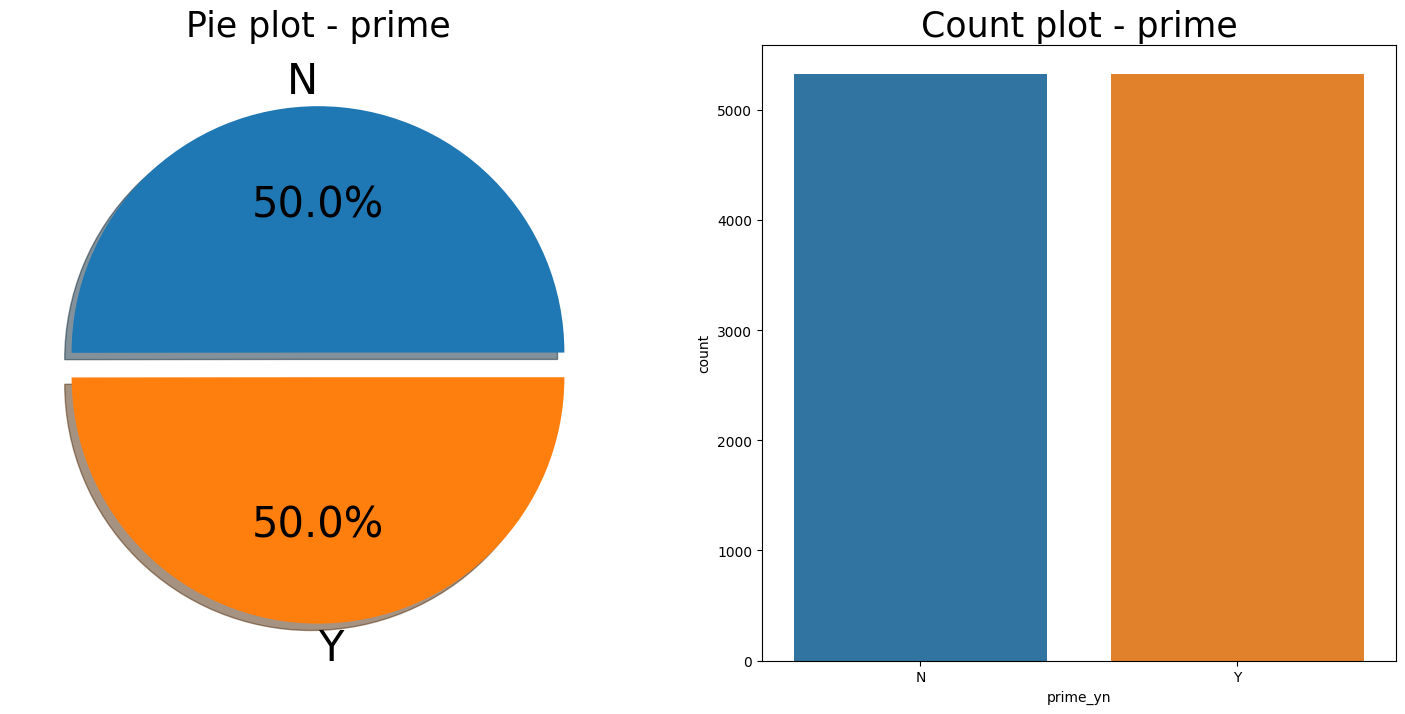

In [13]:
f, ax =plt.subplots(1,2, figsize =(18,8))
scd_noduplicates['prime_yn'].value_counts().plot.pie(explode=[0,0.1],
                                            autopct = '%1.1f%%', ax=ax[0], shadow =True, fontsize=30)
ax[0].set_title('Pie plot - prime', size = 25)
ax[0].set_ylabel('')
sns.countplot(x='prime_yn', data=scd_noduplicates, ax = ax[1])
ax[1].set_title('Count plot - prime',  size = 25)
plt.show()

In [14]:
# 전체에서 임직원, 비임직원 회원의 빈도수 파악
scd_noduplicates.employee_yn.value_counts()

N    5940
Y    4713
Name: employee_yn, dtype: int64

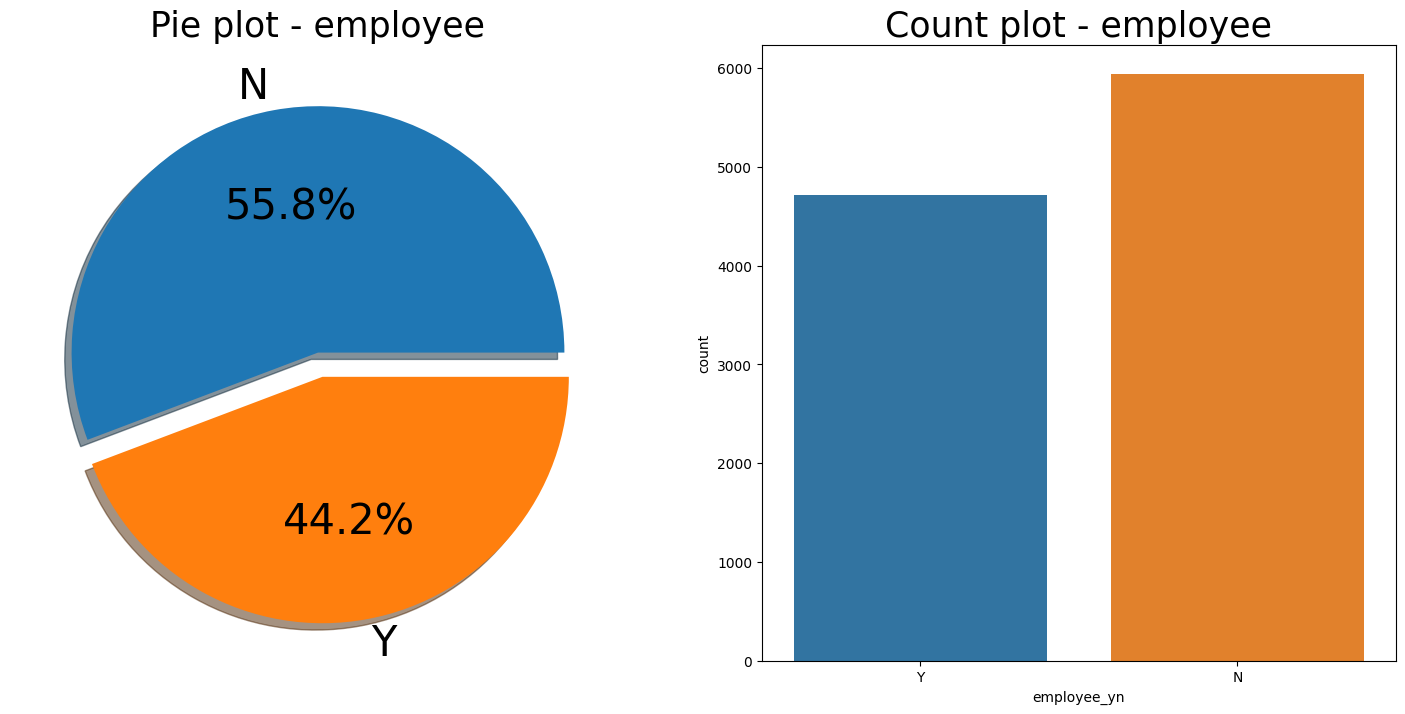

In [15]:
f, ax =plt.subplots(1,2, figsize =(18,8))
scd_noduplicates['employee_yn'].value_counts().plot.pie(explode=[0,0.1],
                                            autopct = '%1.1f%%', ax=ax[0], shadow =True, fontsize=30)
ax[0].set_title('Pie plot - employee', size = 25)
ax[0].set_ylabel('')
sns.countplot(x='employee_yn', data=scd_noduplicates, ax = ax[1])
ax[1].set_title('Count plot - employee',  size = 25)
plt.show()

In [16]:
# 비임직원, 임직원 각각의 프라임 회원, 비프라임 회원의 빈도수 파악
employee = scd_noduplicates.loc[scd_noduplicates.employee_yn == 'Y']
normal = scd_noduplicates.loc[scd_noduplicates.employee_yn == 'N']

In [17]:
# 임직원의 프라임, 비프라임 회원 빈도수 파악
employee.prime_yn.value_counts()

Y    2830
N    1883
Name: prime_yn, dtype: int64

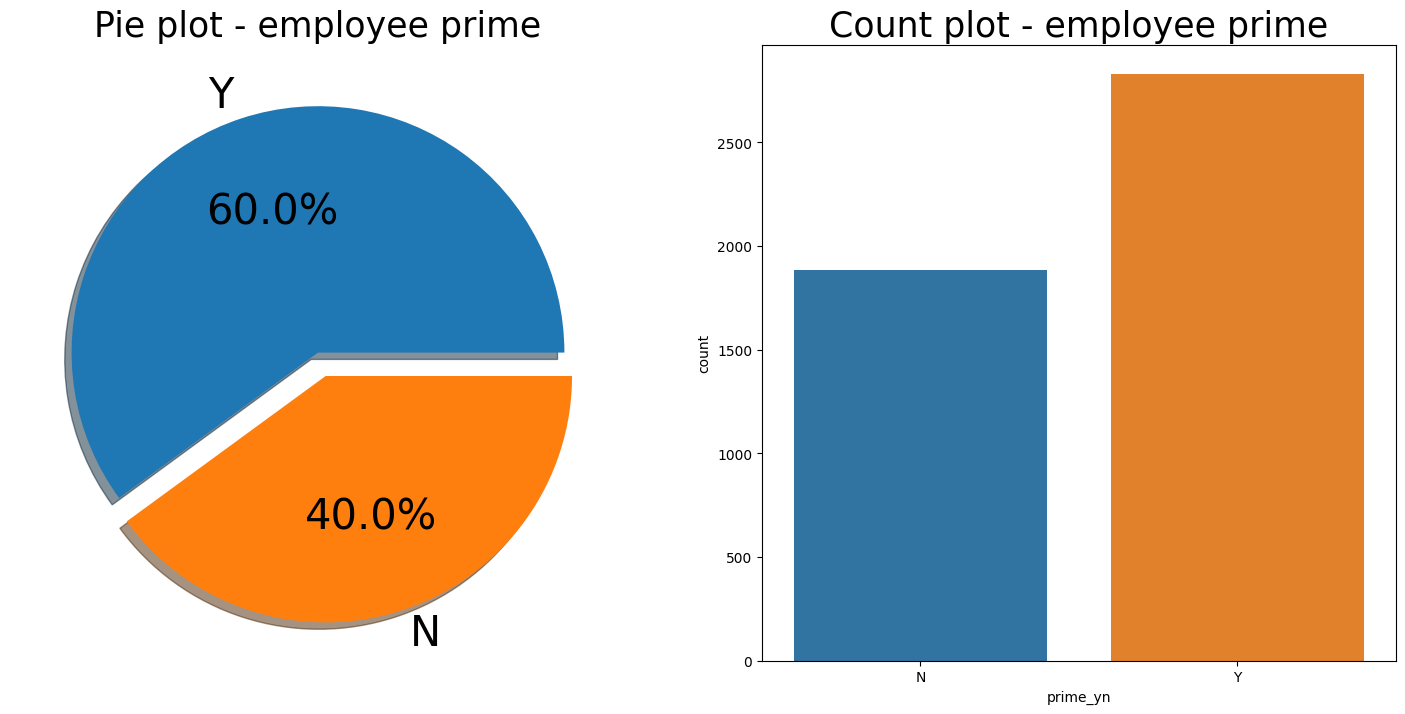

In [18]:
f, ax =plt.subplots(1,2, figsize =(18,8))
employee.prime_yn.value_counts().plot.pie(explode=[0,0.1],
                                            autopct = '%1.1f%%', ax=ax[0], shadow =True, fontsize=30)
ax[0].set_title('Pie plot - employee prime', size = 25)
ax[0].set_ylabel('')
sns.countplot(x='prime_yn', data=employee, ax = ax[1])
ax[1].set_title('Count plot - employee prime',  size = 25)
plt.show()

In [19]:
# 비임직원의 프라임, 비프라임 회원 빈도수 파악
normal.prime_yn.value_counts()

N    3445
Y    2495
Name: prime_yn, dtype: int64

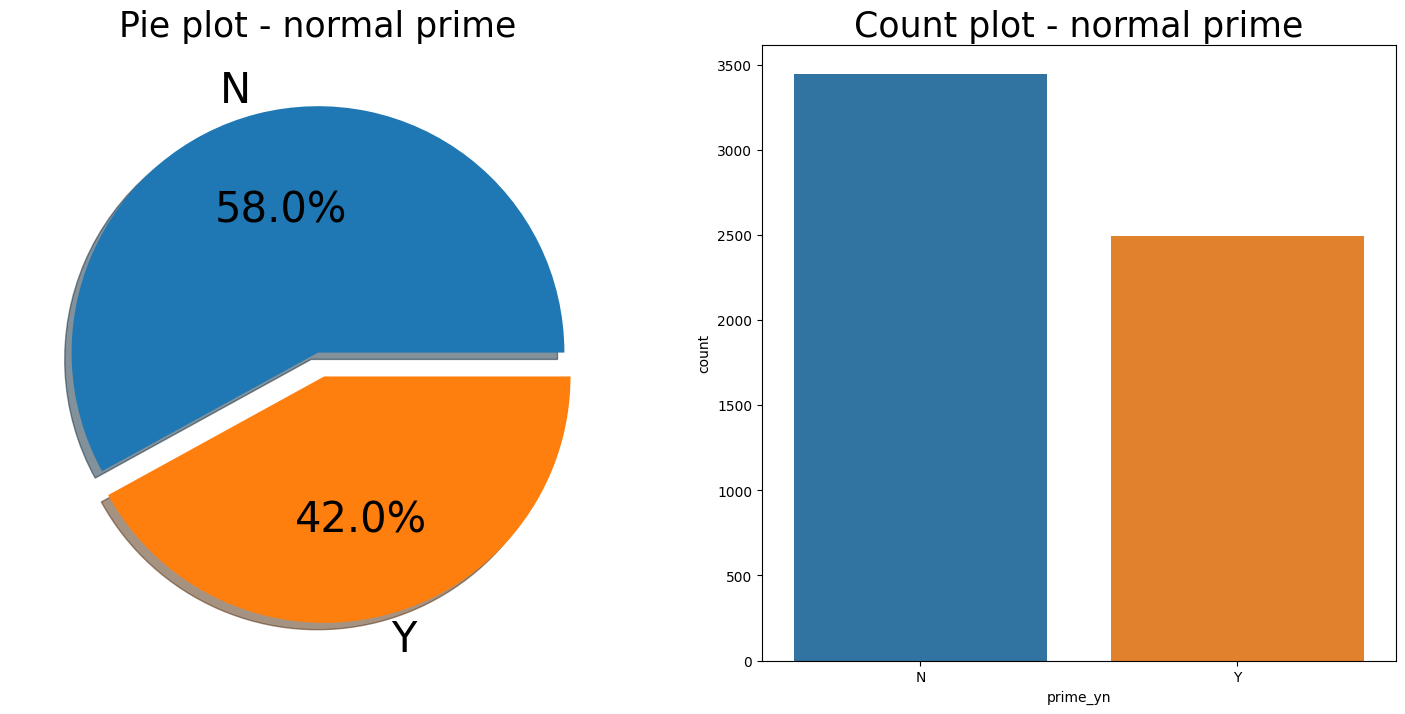

In [20]:
f, ax =plt.subplots(1,2, figsize =(18,8))
normal.prime_yn.value_counts().plot.pie(explode=[0,0.1],
                                            autopct = '%1.1f%%', ax=ax[0], shadow =True, fontsize=30)
ax[0].set_title('Pie plot - normal prime', size = 25)
ax[0].set_ylabel('')
sns.countplot(x='prime_yn', data=normal, ax = ax[1])
ax[1].set_title('Count plot - normal prime',  size = 25)
plt.show()

### 1-1. 라벨 별로 평균 주문 수량, 평균 주문 금액 파악

In [21]:
analysis = data.groupby(['employee_yn','prime_yn'])[['net_order_qty','net_order_amt']].sum()

In [22]:
analysis

net_order_qty  net_order_amt
employee_yn prime_yn                              
N           N                 21874  125013.286012
            Y                 21057  108554.830295
Y           N                 12558   69393.048417
            Y                 22757  116172.090196

In [23]:
analysis['cnt'] = data.groupby(['employee_yn','prime_yn']).count().scd

In [24]:
# 인당 주문수량
analysis.net_order_qty / analysis.cnt

employee_yn  prime_yn
N            N           1.580834
             Y           1.721328
Y            N           1.700704
             Y           1.832139
dtype: float64

In [26]:
# 인당 주문 금액
analysis.net_order_amt / analysis.cnt

employee_yn  prime_yn
N            N           9.034710
             Y           8.873934
Y            N           9.397758
             Y           9.352877
dtype: float64

> 주문건수별로 인당 주문수량을 비교하면, 임직원/비임직원 모두 프라임 회원이 비프라임 회원보다 높게 나타났으며, 인당 주문 금액을 비교하면, 임직원/비임직원 모두 프라임 회원이 비프라임 회원보다 싼 가격에 구매한 것을 알 수 있습니다.

-> 추후에 [상품, 수량] 별로 그룹화 하여, 해당 거래의 가격이 평균적인 가격보다 낮은지, 높은지를 비교할 수 있는 파생 변수를 추가하여 분석할 예정입니다. (가설 1 뒷받침 내용)

### 1-2. 가설 1 "할인이나 가격 혜택을 받아 동일한 상품을 더 저렴하게 구매한 회원 중에 프라임 회원이 많을 것이다"

In [27]:
prime = data[data['prime_yn'] == 'Y']
nonprime = data[data['prime_yn'] == 'N']

In [28]:
prime_amt = prime.groupby(['product_name', 'net_order_qty'])['net_order_amt'].mean().to_frame().reset_index()
prime_amt.rename(columns={'net_order_amt' : 'net_order_amt_prime'}, inplace=True)
prime_amt

,product_name,net_order_qty,net_order_amt_prime
0,(냉동) 비비고 테이블 특 선물세트 (특양지곰탕700gx2개+특설렁탕700gx1개),1,10.220281
1,(냉동) 비비고 테이블 특 선물세트 (특양지곰탕700gx2개+특설렁탕700gx1개),2,10.914124
2,(냉동) 비비고 테이블 특설렁탕 700g,1,8.910623
3,(냉동) 비비고 테이블 특설렁탕 700g,2,9.708680
4,(냉동) 비비고 테이블 특설렁탕 700g,3,9.879576
...,...,...,...
5803,헬씨누리 침향환 환심 10환,1,9.514658
5804,헬씨누리 침향환 환심 10환X6입(1BOX)_행사,1,11.043706
5805,훈제대란 20구,1,9.126706
5806,훈제대란 20구,2,9.649498


In [29]:
nonprime_amt = nonprime.groupby(['product_name', 'net_order_qty'])['net_order_amt'].mean().to_frame().reset_index()
nonprime_amt.rename(columns={'net_order_amt' : 'net_order_amt_nonprime'}, inplace=True)
nonprime_amt

,product_name,net_order_qty,net_order_amt_nonprime
0,(냉동) 비비고 테이블 특 선물세트 (특양지곰탕700gx2개+특설렁탕700gx1개),1,10.270577
1,(냉동) 비비고 테이블 특설렁탕 700g,1,8.980387
2,(냉동) 비비고 테이블 특설렁탕 700g,2,9.713655
3,(냉동) 비비고 테이블 특설렁탕 700g,5,10.896758
4,(냉동) 비비고 테이블 특설렁탕 700gx2개,1,9.875140
...,...,...,...
4762,행복한콩 폭신폭신 두부볼 750g,3,10.263118
4763,헬씨누리 침향환 환심 10환,1,9.562475
4764,헬씨누리 침향환 환심 10환X6입(1BOX)_패밀리데이,1,11.091499
4765,훈제대란 20구,1,9.255307


In [30]:
total_amt = pd.merge(prime_amt, nonprime_amt, on=['product_name', 'net_order_qty'])
total_amt['is_prime_lower_amt'] = (total_amt['net_order_amt_prime'] < total_amt['net_order_amt_nonprime'])
total_amt.head()

,product_name,net_order_qty,net_order_amt_prime,net_order_amt_nonprime,is_prime_lower_amt
0,(냉동) 비비고 테이블 특 선물세트 (특양지곰탕700gx2개+특설렁탕700gx1개),1,10.220281,10.270577,True
1,(냉동) 비비고 테이블 특설렁탕 700g,1,8.910623,8.980387,True
2,(냉동) 비비고 테이블 특설렁탕 700g,2,9.708680,9.713655,True
3,(냉동) 비비고 테이블 특설렁탕 700g,5,10.221152,10.896758,True
4,(냉동) 비비고 테이블 특설렁탕 700x2개+(냉동) 비비고 테이블 특양지곰탕 70...,1,10.536988,10.592361,True


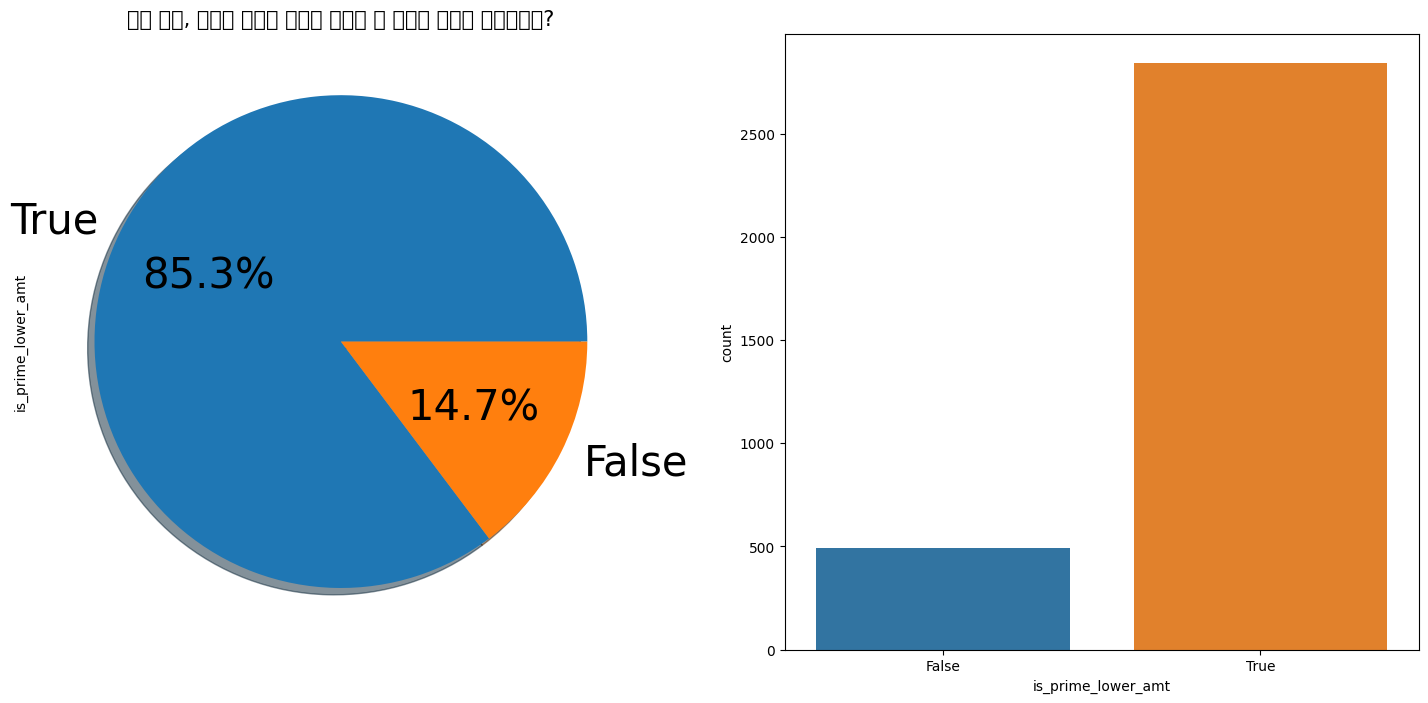

In [31]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

#pie plot
total_amt['is_prime_lower_amt'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True, fontsize=30)
ax[0].set_title('동일 상품, 개수에 대하여 프라임 회원이 더 저렴한 가격에 구매했는가?', size = 15)

#count plot
sns.countplot(x=total_amt['is_prime_lower_amt'], ax=ax[1])

plt.show()

> 동일 상품, 개수에 대해 그룹화하고 프라임 회원과 비프라임 회원의 평균 거래 가격을 비교한 결과, 약 85.3% 의 거래가 프라임 회원의 평균 거래 가격이 더 낮게 나온 것을 확인할 수 있다.

## 2. 날짜/요일 관련 분석

In [32]:
# 2023년 1월 달력 출력
from calendar import *
print(prmonth(2023,1))

    January 2023
Mo Tu We Th Fr Sa Su
                   1
 2  3  4  5  6  7  8
 9 10 11 12 13 14 15
16 17 18 19 20 21 22
23 24 25 26 27 28 29
30 31
None


<Axes: title={'center': 'Order_Date'}>

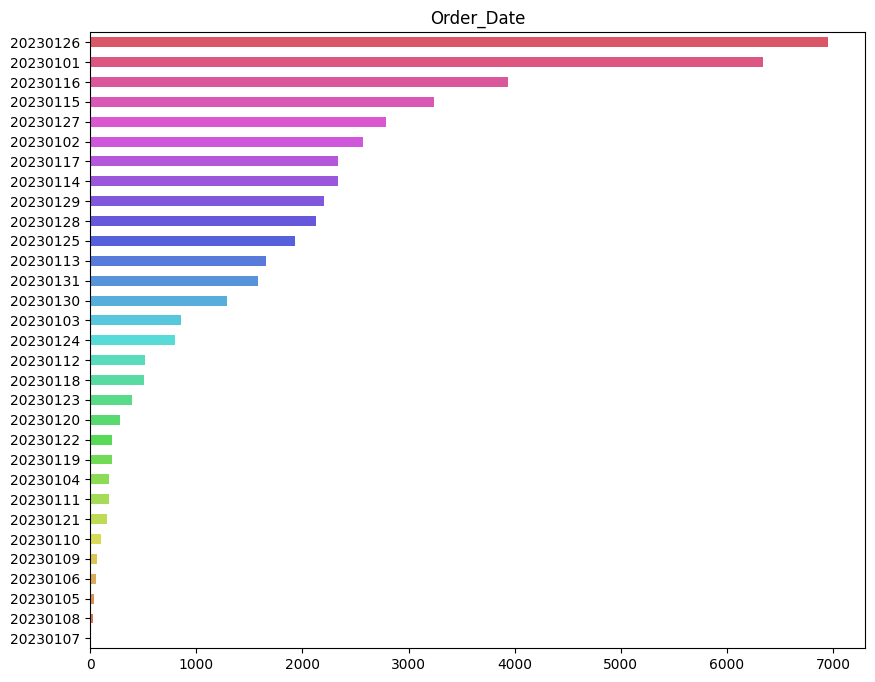

In [33]:
# 26,1, 16, 15,27, 2, 17, 14, 29, 28, 25, 13, 31, 30, 3, 24, 12, 18...
# 연속된 날짜가 많은 것으로 보아 이벤트가 있었을 것으로 예상할 수 있을 것 같습니다.
date = data["order_date"].value_counts().head(31)
colors = sns.color_palette('hls',len(data['order_date'].unique()))
date = date.sort_values(ascending=True)
date.plot.barh(figsize=(10,8), title="Order_Date", color=colors)

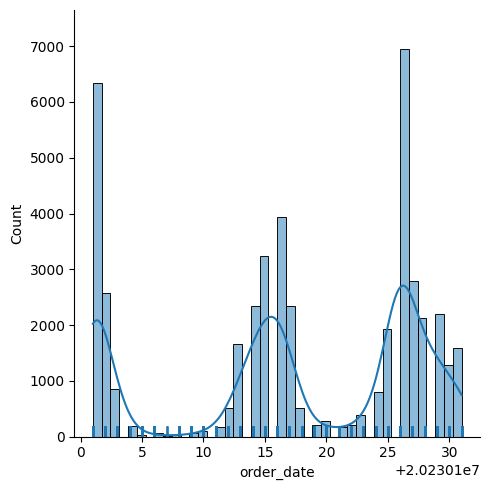

In [34]:
# 월 초, 중간, 말에 주기가 발생한 것을 확인할 수 있습니다.
sns.displot(data=data,x="order_date", kde=True, rug=True)

In [35]:
#  order_date 변수를 활용하여 직접 나머지를 계산하였습니다. (ex. (20230101 + 4) % 31 = 1이 되는 성질 이용)
data['date'] = (data.order_date + 4) % 31
data.loc[data.date == 0,'date'] = 31

# 요일 변수도 중요한 변수가 될 수도 있다고 생각하여, 요일 변수도 생성합니다.
# 2023년 1월 1일이 일요일인 점을 활용하여, day_of_week을 {1 : '일', 2 : '월', 3: '화', 4: '수', 5: '목', 6: '금', 0: '토'} 로 설정
data['day_of_week'] = data.date % 7

In [36]:
#  order_date 변수를 활용하여 직접 나머지를 계산하였습니다. (ex. (20230101 + 4) % 31 = 1이 되는 성질 이용)
employee['date'] = (employee.order_date + 4) % 31
employee.loc[data.date == 0,'date'] = 31

# 요일 변수도 중요한 변수가 될 수도 있다고 생각하여, 요일 변수도 생성합니다.
# 2023년 1월 1일이 일요일인 점을 활용하여, day_of_week을 {1 : '일', 2 : '월', 3: '화', 4: '수', 5: '목', 6: '금', 0: '토'} 로 설정
employee['day_of_week'] = employee.date % 7

In [37]:
#  order_date 변수를 활용하여 직접 나머지를 계산하였습니다. (ex. (20230101 + 4) % 31 = 1이 되는 성질 이용)
normal['date'] = (normal.order_date + 4) % 31
normal.loc[data.date == 0,'date'] = 31

# 요일 변수도 중요한 변수가 될 수도 있다고 생각하여, 요일 변수도 생성합니다.
# 2023년 1월 1일이 일요일인 점을 활용하여, day_of_week을 {1 : '일', 2 : '월', 3: '화', 4: '수', 5: '목', 6: '금', 0: '토'} 로 설정
normal['day_of_week'] = normal.date % 7

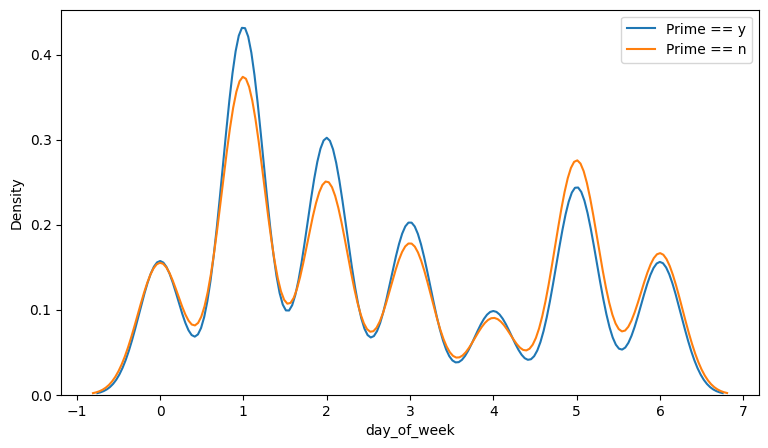

In [38]:
# 전체 데이터에서 프라임 회원과 비프라임 회원의 구매 분포가 요일별로 어떻게 다른지 시각화 그래프를 통해 확인

fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(data[data['prime_yn']=='Y']['day_of_week'], ax = ax)
sns.kdeplot(data[data['prime_yn']=='N']['day_of_week'], ax = ax)
plt.legend(['Prime == y', 'Prime == n'])
plt.show()

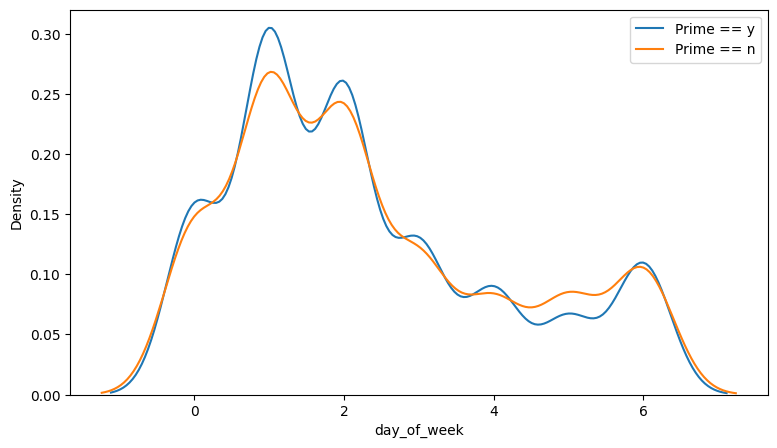

In [39]:
# 임직원 데이터에서 요일별로 분포 양상이 어떻게 다른지 파악합니다.

fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(employee[employee['prime_yn']=='Y']['day_of_week'], ax = ax)
sns.kdeplot(employee[employee['prime_yn']=='N']['day_of_week'], ax = ax)
plt.legend(['Prime == y', 'Prime == n'])
plt.show()

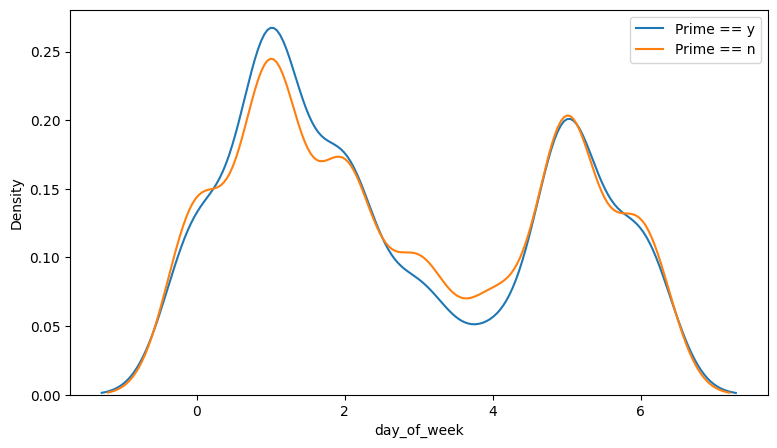

In [40]:
# 비임직원 데이터에서 요일별로 분포 양상이 어떻게 다른지 파악합니다.

fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(normal[normal['prime_yn']=='Y']['day_of_week'], ax = ax)
sns.kdeplot(normal[normal['prime_yn']=='N']['day_of_week'], ax = ax)
plt.legend(['Prime == y', 'Prime == n'])
plt.show()

> 대체적으로 일요일과 월요일에 주문량이 많으며, 이 시기에 또한 프라임 회원의 주문량이 많은 것을 알 수 있습니다.

> 주문량이 많은 날짜에 1/1일, 1/2일, 1/15일, 1/16일 등이 포함되며 1월 첫째주 일-월요일, 셋째주 일-월요일에 해당됩니다.

> 비임직원이 목요일에 주문량이 상대적으로 많아보이지만, 이는 1/26에 압도적으로 주문량이 많았기 때문으로 볼 수 있으며, 이는 설 연휴 전후로 진행된 이벤트를 원인으로 생각할 수 있을 것 같습니다.

-> 분석 과정에서 매출량이 압도적으로 많은 시점인 1/1-2일, 1/13-17일, 1/25-31일에 거래된 데이터인지 확인하는 날짜 관련 파생 변수를 생성할 것입니다.

-> 요일별로 분포가 다른 것을 활용하여 더미 변수를 만들어서 분석을 진행할 예정입니다.

-> 공휴일 유무를 나타내는 파생변수 (1월 1일, 21, 22, 23, 24일)를 추가해서 분석할 예정입니다.

## 3. 연령별 분석

Text(0.5, 1.0, 'Age Group')

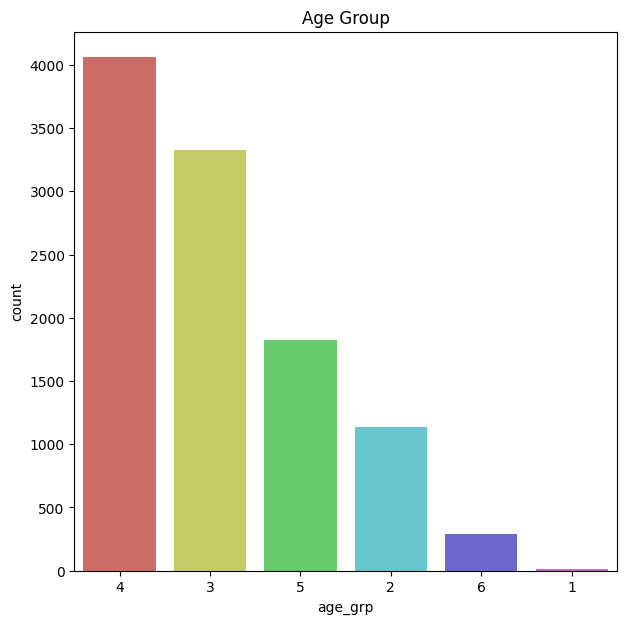

In [41]:
# age group 별로 분포가 어느 정도 되는지 파악해보기 위해 그래프를 그려봅니다.
# 4 > 3 > 5 > 2 > 6 > 1 순서대로 나타난 것을 확인해볼 수 있으며, 수입이 안정적이고,
# 신선식품몰을 가장 많이 이용하는 30-40대 층이 가장 많게, 수입이 적은 10-20대 층 및 60대 이상층이 적게 나타난 것을 통해
# {1 : '10대', 2: '20대', 3: '30대', 4: '40대', 5: '50대', 6: '60대 및 이상'} 으로 파악할 수 있을 것입니다.

plt.subplots(figsize=(7,7))
palette = sns.color_palette('hls',6)
age_tmp=sns.countplot(x = 'age_grp', data = scd_noduplicates, order = data['age_grp'].value_counts().index, palette=palette)
age_tmp.set_title('Age Group')

### 3-1. 가설 2 - 30대~40대 회원 중에 프라임 회원이 많을 것이다.

In [42]:
# 연령별로 프라임 회원의 분포를 확인해보기 위해, 'age_grp', 'prime_yn' 변수로 그룹화하여 확인합니다.
# 파생변수로, 연령대 그룹에서 프라임 회원의 비율을 나타낼 수 있는 'prop' 을 추가해보겠습니다.

data_age = scd_noduplicates.groupby(['age_grp','prime_yn']).count()['product_name'].to_frame()
data_age.rename(columns={'product_name' : 'cnt'}, inplace=True)
data_age['prop'] = data_age['cnt'] / scd_noduplicates.groupby('age_grp')['product_name'].count() * 100

In [43]:
data_age

cnt        prop
age_grp prime_yn                  
1       N           11  100.000000
2       N          668   58.906526
        Y          466   41.093474
3       N         1738   52.192192
        Y         1592   47.807808
4       N         1988   48.977581
        Y         2071   51.022419
5       N          798   43.678161
        Y         1029   56.321839
6       N          125   42.808219
        Y          167   57.191781

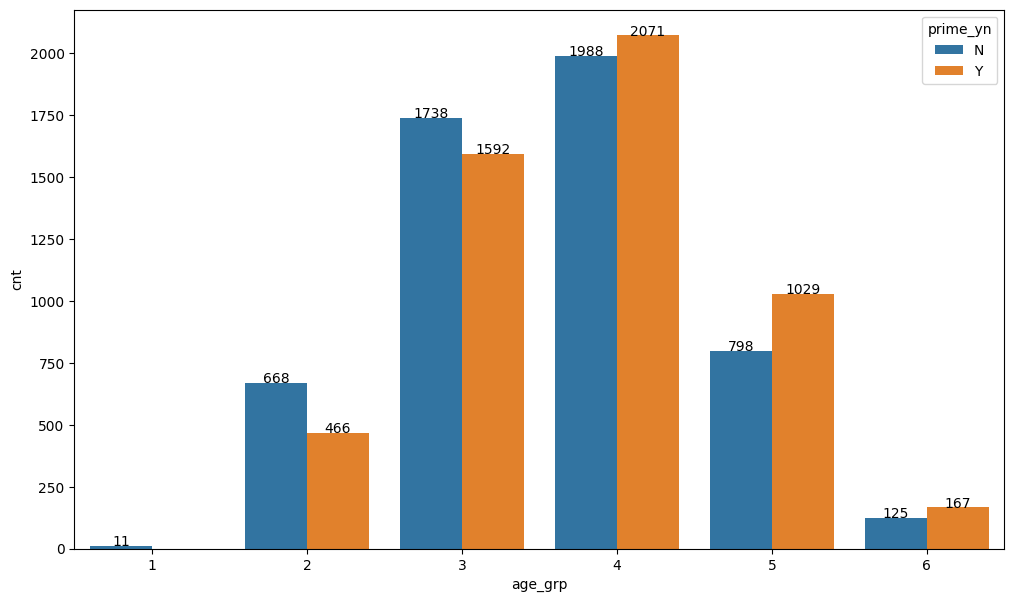

In [44]:
# age group별로 프라임 회원과 비프라임 회원의 수를 시각화 해보겠습니다.

data_age_reset_index = data_age.reset_index()
fig, ax = plt.subplots(1, figsize=(12, 7))
sns.barplot(x='age_grp', y='cnt', hue='prime_yn', data=data_age_reset_index)
for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) , p.get_y() + p.get_height(), f"{p.get_height():.0f}", ha = 'center')

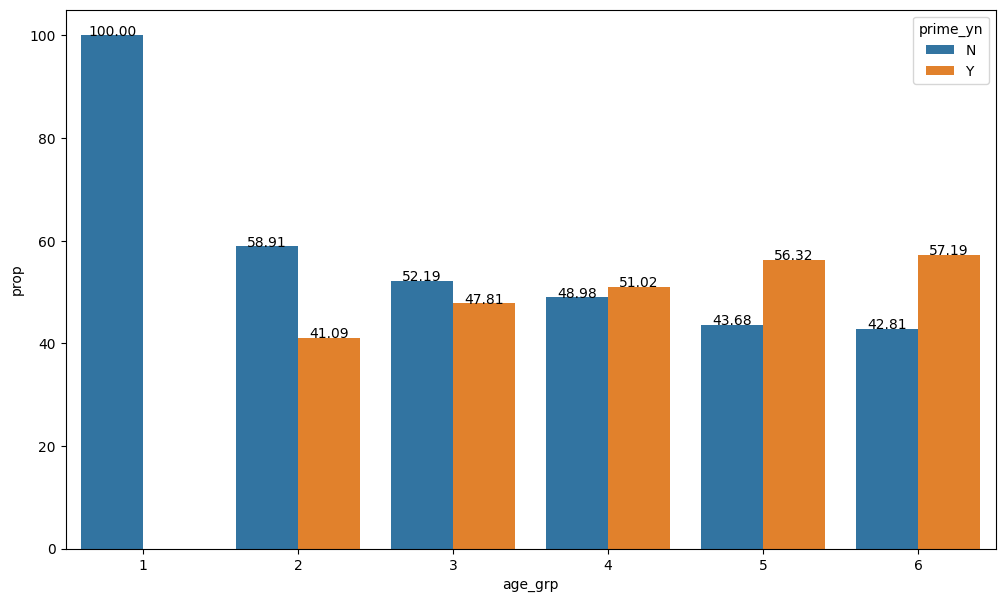

In [45]:
# age group별로 프라임 회원과 비프라임 회원의 비율을 시각화 해보겠습니다.

data_age_reset_index = data_age.reset_index()
fig, ax = plt.subplots(1, figsize=(12, 7))
sns.barplot(x='age_grp', y='prop', hue='prime_yn', data=data_age_reset_index)
for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) , p.get_y() + p.get_height(), f"{p.get_height():.2f}", ha = 'center')

> 30-40대 층이 CJ더마켓 이용자 수가 가장 많은 만큼, 프라임 회원 수가 가장 많이 분포하고 있는 점을 확인할 수 있습니다. (가설 2 뒷받침 내용)

> 연령별로 프라임 회원의 비율을 파악한 결과, 연령층이 증가할수록, 프라임 회원의 비율이 미세하게 증가하고 있는 확인할 수 있습니다.

> 연령과 관련된 전처리는 연령대별로 특징이 상이하게 나타나므로(30-40대 층이 마켓 이용자가 많은 만큼 프라임 회원 수가 가장 많지만, 프라임 회원의 비율은 상대적으로 이용자 수는 적은 50-60대가 많다.) 연령과 관련된 변수는 더미 변수로 추가하겠습니다.

## 4. 성별 분석

In [46]:
# CJ 더마켓의 남성 회원보다 여성 회원들이 많이 이용하는 것을 알 수 있다.
scd_noduplicates.gender.value_counts()

F    5926
M    4727
Name: gender, dtype: int64

Text(0.5, 1.0, 'Gender')

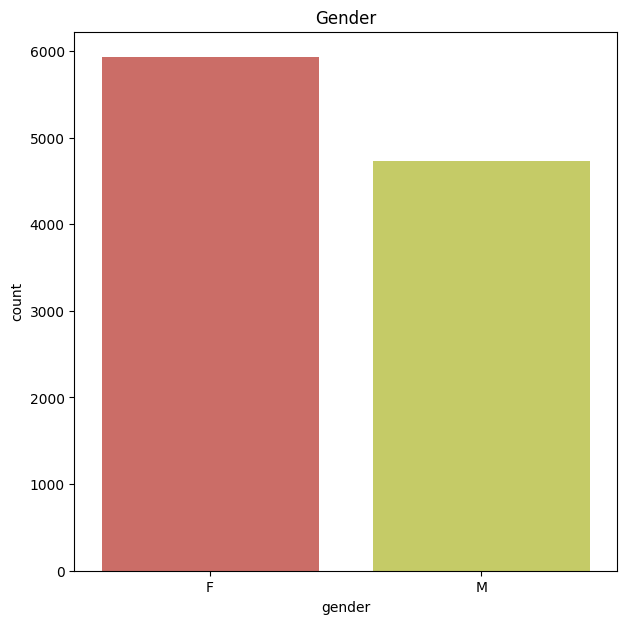

In [47]:
plt.subplots(figsize=(7,7))
palette = sns.color_palette('hls',6)
age_tmp=sns.countplot(x = 'gender', data = scd_noduplicates, order = data['gender'].value_counts().index, palette=palette)
age_tmp.set_title('Gender')

In [48]:
# 임직원의 성별 분포

employee.gender.value_counts()

M    2797
F    1916
Name: gender, dtype: int64

Text(0.5, 1.0, 'Gender')

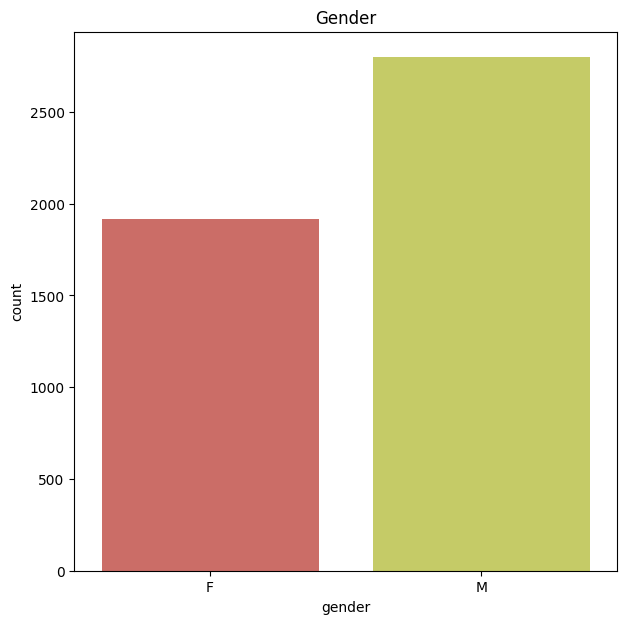

In [49]:
plt.subplots(figsize=(7,7))
palette = sns.color_palette('hls',6)
age_tmp=sns.countplot(x = 'gender', data = employee, order = data['gender'].value_counts().index, palette=palette)
age_tmp.set_title('Gender')

In [50]:
# 비임직원의 성별 분포

normal.gender.value_counts()

F    4010
M    1930
Name: gender, dtype: int64

Text(0.5, 1.0, 'Gender')

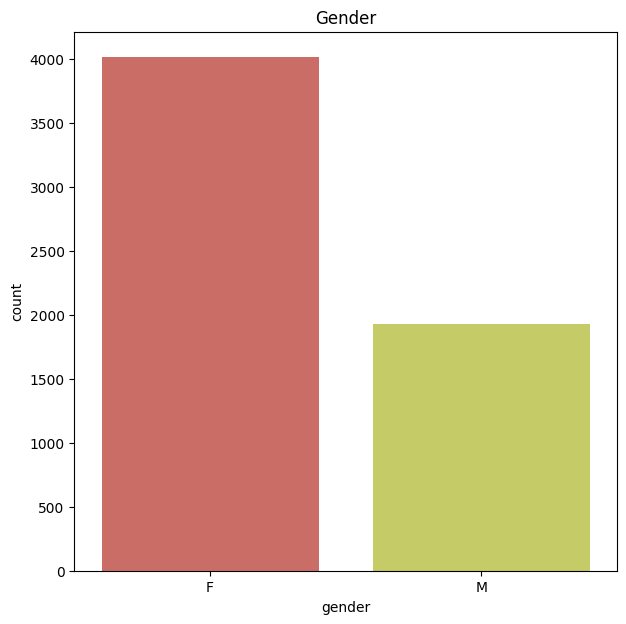

In [51]:
plt.subplots(figsize=(7,7))
palette = sns.color_palette('hls',6)
age_tmp=sns.countplot(x = 'gender', data = normal, order = data['gender'].value_counts().index, palette=palette)
age_tmp.set_title('Gender')

### 4-1. 가설 3 여성 회원 중에 프라임 회원이 많을 것이다.

In [52]:
# 임직원 중 프라임 회원의 성별 분포 확인 (임직원은 남성이 프라임 회원이 더 많다.)

employee[employee['prime_yn'] == 'Y'].gender.value_counts()

M    1739
F    1091
Name: gender, dtype: int64

Text(0.5, 1.0, 'Gender')

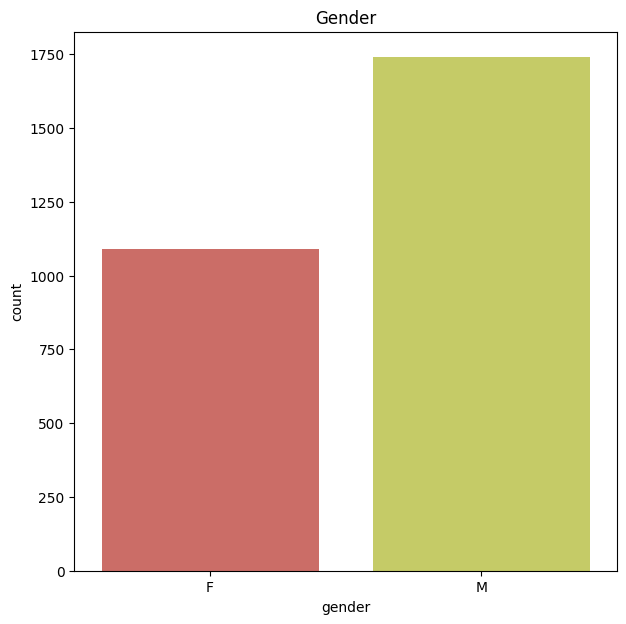

In [53]:
plt.subplots(figsize=(7,7))
palette = sns.color_palette('hls',6)
age_tmp=sns.countplot(x = 'gender', data = employee[employee['prime_yn'] == 'Y'], order = data['gender'].value_counts().index, palette=palette)
age_tmp.set_title('Gender')

In [54]:
# 비임직원 중 프라임 회원의 성별 분포 확인 (비임직원은 여성의 프라임 회원이 더 많다.)

normal[normal['prime_yn'] == 'Y'].gender.value_counts()

F    1582
M     913
Name: gender, dtype: int64

Text(0.5, 1.0, 'Gender')

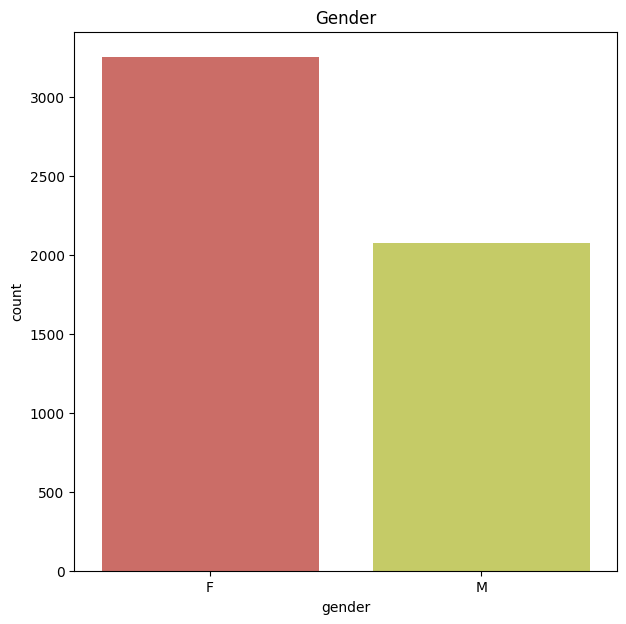

In [55]:
plt.subplots(figsize=(7,7))
palette = sns.color_palette('hls',6)
age_tmp=sns.countplot(x = 'gender', data = scd_noduplicates[scd_noduplicates['prime_yn'] == 'N'], order = data['gender'].value_counts().index, palette=palette)
age_tmp.set_title('Gender')

-> 임직원은 남성이 프라임 회원이 더 많은 분포, 비임직원은 여성이 프라임 회원이 더 많은 분포의 특징을 살펴볼 수 있습니다.

-> 추후 모델링을 적용할 데이터셋으로 "gender" 라는 성별 변수를 그대로 적용하여 각각 임직원에서는 남성일 수록, 비임직원에서는 여성일수록 프라임 회원일 확률이 높아지는 방향으로 예측하겠습니다.

## 5. 주문 수량 분포 파악

단순히 각 상품 주문별 수량이 2이상인 주문과 1인 주문만을 놓고 비교해보면, 2이상인 주문이 상대적으로 프라임 회원이 많이 분포하는 것을 알 수 있습니다.

In [56]:
data[data.net_order_qty >= 2].prime_yn.value_counts()

Y    7152
N    5143
Name: prime_yn, dtype: int64

In [57]:
data[data.net_order_qty == 1].prime_yn.value_counts()

Y    17502
N    16078
Name: prime_yn, dtype: int64

### 5-1. 구매 개수가 많은 데이터의 특징 파악하기 및 "bulk" 파생변수 추가

In [58]:
data.sort_values(by='net_order_qty', ascending=False).head(50)

,Unnamed: 0,scd,product_name,net_order_qty,net_order_amt,gender,age_grp,employee_yn,order_date,prime_yn,date,day_of_week
40853,40853,20230109046418,[2023설임직원캠페인대량구매] 특별한선택 Y호,196,15.647347,M,4,N,20230109,N,9,2
28529,28529,20230111071770,[2023설선물세트대량구매]특별한선택 K-2호,180,15.224838,F,3,N,20230111,N,11,4
38570,38570,20230110058557,[2023설사원선물신청] 스팸 8C호,138,14.960234,F,3,Y,20230110,Y,10,3
18145,18145,20230110064825,[2023설선물세트]스팸고급유4호,104,14.703951,M,5,N,20230110,N,10,3
16273,16273,20230113094377,[2023설선물세트]스팸스위트1호,97,14.660738,F,3,N,20230113,N,13,6
42049,42049,20230101966659,[2023설선물세트]백설 고소한 참기름 2호,96,13.846193,M,6,N,20230101,Y,1,1
14579,14579,20230113090654,[2023설선물세트]스팸6호,96,15.613650,F,4,N,20230113,N,13,6
44232,44232,20230110058557,[2023설사원선물신청] 백설 프리미엄 17호,88,14.087460,F,3,Y,20230110,Y,10,3
40708,40708,20230102976644,[2023설선물세트]특별한선택 2호,77,14.340328,F,3,N,20230102,N,2,2
21187,21187,20230113088903,[2023설사원선물신청] CJ명가 토종김 3S호,70,13.905827,F,5,Y,20230113,Y,13,6


In [59]:
data.loc[data.net_order_qty > 36]

,Unnamed: 0,scd,product_name,net_order_qty,net_order_amt,gender,age_grp,employee_yn,order_date,prime_yn,date,day_of_week
13668,13668,20230113094820,[2023설사원선물신청] 스팸8호,50,13.987698,F,2,Y,20230113,N,13,6
13846,13846,20230113092571,[2023설선물세트]백설 카놀라유 3호,48,13.168485,M,5,N,20230113,N,13,6
13927,13927,20230113093326,[2023설임직원캠페인]스팸마일드8호,38,13.702343,M,6,N,20230113,N,13,6
14579,14579,20230113090654,[2023설선물세트]스팸6호,96,15.613650,F,4,N,20230113,N,13,6
14830,14830,20230112080329,[2023설선물세트]스팸8C호,67,14.419444,M,5,N,20230112,N,12,5
16202,16202,20230115109076,[2023설사원선물신청] 스팸SY호,49,13.927389,F,5,Y,20230115,Y,15,1
16273,16273,20230113094377,[2023설선물세트]스팸스위트1호,97,14.660738,F,3,N,20230113,N,13,6
17884,17884,20230116119459,[2023설선물세트]특별한선택 2호,44,13.743860,F,4,N,20230116,Y,16,2
18145,18145,20230110064825,[2023설선물세트]스팸고급유4호,104,14.703951,M,5,N,20230110,N,10,3
20805,20805,20230113090312,[2023설선물세트]스팸마일드8호,44,13.926371,F,4,N,20230113,Y,13,6


-> 상품의 주문 수량이 36보다 큰 데이터는 모두 2023 설선물 세트와 관련 있는 데이터로 확인할 수 있으며, "bulk" 라는 파생변수를 추가하여 분석에 활용해볼 예정입니다.

### 5-2. 가설 4 검정 "주문하는 품목의 개수가 프라임 회원이 프라임이 아닌 회원보다 많을 것입니다."

scd가 같으면, 같은 주문에 관한 내용이므로, scd별로 그룹화하여, 총 net_order_qty(상품 수량)이 클수록 프라임 회원인 확률이 높아지는지 확인해보도록 하겠습니다.

In [60]:
prime_sum_qty = data[data['prime_yn'] == 'Y'].groupby('scd')[['net_order_qty']].sum()
prime_sum_qty

,net_order_qty
scd,
20230101963235,2
20230101963244,3
20230101963247,6
20230101963251,2
20230101963253,6
...,...
20230131216657,2
20230131216709,6
20230131216734,3


In [61]:
nonprime_sum_qty = data[data['prime_yn'] == 'N'].groupby('scd')[['net_order_qty']].sum()
nonprime_sum_qty

,net_order_qty
scd,
20230101963226,6
20230101963302,17
20230101963317,3
20230101963319,23
20230101963345,1
...,...
20230131216565,4
20230131216674,4
20230131216756,3


In [62]:
print('프라임 회원의 주문 건당 평균 주문 상품 개수 : {}'.format(prime_sum_qty['net_order_qty'].mean()))
print('비프라임 회원의 주문 건당 평균 주문 상품 개수 : {}'.format(nonprime_sum_qty['net_order_qty'].mean()))

프라임 회원의 주문 건당 평균 주문 상품 개수 : 8.227981220657277
비프라임 회원의 주문 건당 평균 주문 상품 개수 : 6.4624624624624625


In [63]:
print('프라임 회원의 주문 건당 중위값 주문 상품 개수 : {}'.format(prime_sum_qty['net_order_qty'].median()))
print('비프라임 회원의 주문 건당 중위값 주문 상품 개수 : {}'.format(nonprime_sum_qty['net_order_qty'].median()))

프라임 회원의 주문 건당 중위값 주문 상품 개수 : 5.0
비프라임 회원의 주문 건당 중위값 주문 상품 개수 : 4.0


In [64]:
prime_qty_valcnt = prime_sum_qty.value_counts().sort_index().to_frame().reset_index()
prime_qty_valcnt.rename(columns={0:'cnt'}, inplace=True)
prime_qty_valcnt['prime_yn'] = 'Y'
prime_qty_valcnt['prop'] = prime_qty_valcnt['cnt'] / prime_qty_valcnt['cnt'].sum() * 100
prime_qty_valcnt.sort_values(by='net_order_qty').head()

,net_order_qty,cnt,prime_yn,prop
0,1,1062,Y,19.943662
1,2,649,Y,12.187793
2,3,459,Y,8.619718
3,4,372,Y,6.985915
4,5,370,Y,6.948357


In [65]:
prime_qty_valcnt['cummulative_prop'] = 0.0
for i in range(len(prime_qty_valcnt)):
    temp = 0.0
    for j in range(i+1):
        temp += prime_qty_valcnt['prop'][j]
    prime_qty_valcnt['cummulative_prop'][i] = temp

prime_qty_valcnt

,net_order_qty,cnt,prime_yn,prop,cummulative_prop
0,1,1062,Y,19.943662,19.943662
1,2,649,Y,12.187793,32.131455
2,3,459,Y,8.619718,40.751174
3,4,372,Y,6.985915,47.737089
4,5,370,Y,6.948357,54.685446
...,...,...,...,...,...
74,91,1,Y,0.018779,99.924883
75,96,1,Y,0.018779,99.943662
76,112,1,Y,0.018779,99.962441
77,116,1,Y,0.018779,99.981221


In [66]:
prime_qty_valcnt.head(30)

,net_order_qty,cnt,prime_yn,prop,cummulative_prop
0,1,1062,Y,19.943662,19.943662
1,2,649,Y,12.187793,32.131455
2,3,459,Y,8.619718,40.751174
3,4,372,Y,6.985915,47.737089
4,5,370,Y,6.948357,54.685446
5,6,294,Y,5.521127,60.206573
6,7,230,Y,4.319249,64.525822
7,8,207,Y,3.887324,68.413146
8,9,157,Y,2.948357,71.361502
9,10,201,Y,3.774648,75.136150


In [67]:
nonprime_qty_valcnt = nonprime_sum_qty.value_counts().sort_index().to_frame().reset_index()
nonprime_qty_valcnt.rename(columns={0:'cnt'}, inplace=True)
nonprime_qty_valcnt['prime_yn'] = 'N'
nonprime_qty_valcnt['prop'] = nonprime_qty_valcnt['cnt'] / nonprime_qty_valcnt['cnt'].sum() * 100
nonprime_qty_valcnt.sort_values(by='net_order_qty').head()

,net_order_qty,cnt,prime_yn,prop
0,1,1183,N,22.203453
1,2,707,N,13.269520
2,3,505,N,9.478228
3,4,491,N,9.215465
4,5,421,N,7.901652


In [68]:
nonprime_qty_valcnt['cummulative_prop'] = 0.0
for i in range(len(nonprime_qty_valcnt)):
    temp = 0.0
    for j in range(i+1):
        temp += nonprime_qty_valcnt['prop'][j]
    nonprime_qty_valcnt['cummulative_prop'][i] = temp

nonprime_qty_valcnt

,net_order_qty,cnt,prime_yn,prop,cummulative_prop
0,1,1183,N,22.203453,22.203453
1,2,707,N,13.269520,35.472973
2,3,505,N,9.478228,44.951201
3,4,491,N,9.215465,54.166667
4,5,421,N,7.901652,62.068318
...,...,...,...,...,...
62,104,1,N,0.018769,99.924925
63,118,1,N,0.018769,99.943694
64,125,1,N,0.018769,99.962462
65,180,1,N,0.018769,99.981231


In [69]:
nonprime_qty_valcnt.head(30)

,net_order_qty,cnt,prime_yn,prop,cummulative_prop
0,1,1183,N,22.203453,22.203453
1,2,707,N,13.269520,35.472973
2,3,505,N,9.478228,44.951201
3,4,491,N,9.215465,54.166667
4,5,421,N,7.901652,62.068318
5,6,324,N,6.081081,68.149399
6,7,248,N,4.654655,72.804054
7,8,214,N,4.016517,76.820571
8,9,140,N,2.627628,79.448198
9,10,183,N,3.434685,82.882883


In [70]:
totprime_qty_valcnt = pd.concat([prime_qty_valcnt.head(30), nonprime_qty_valcnt.head(30)])
totprime_qty_valcnt

,net_order_qty,cnt,prime_yn,prop,cummulative_prop
0,1,1062,Y,19.943662,19.943662
1,2,649,Y,12.187793,32.131455
2,3,459,Y,8.619718,40.751174
3,4,372,Y,6.985915,47.737089
4,5,370,Y,6.948357,54.685446
5,6,294,Y,5.521127,60.206573
6,7,230,Y,4.319249,64.525822
7,8,207,Y,3.887324,68.413146
8,9,157,Y,2.948357,71.361502
9,10,201,Y,3.774648,75.136150


* 수량 합 개수의 분포

net_qty가 커질수록, prime, unprime에서 겹치는 숫자가 없어서, 총 주문 상품 수량이 30인 데이터까지만 시각화 해보겠습니다. prime 회원중 총 net_qty가 30 이하인 고객 비율이 96.4%, unprime 회원은 98.3% 정도이므로 설명력은 충분하다고 생각합니다. 30보다 큰 부분은 밑에 따로 비율을 계산하여 출력하였습니다.

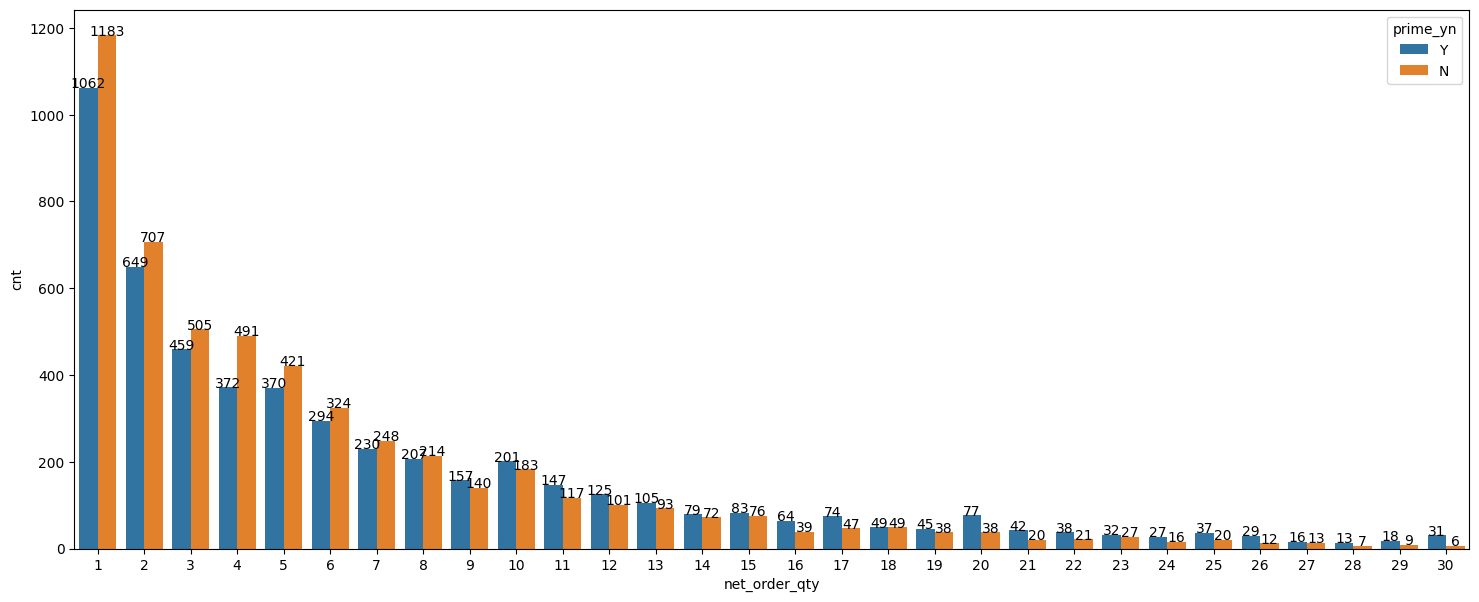

In [71]:
# 수량 합별로 프라임회원, 비프라임 회원 수의 분포 시각화

fig, ax = plt.subplots(1, figsize=(18, 7))
sns.barplot(x='net_order_qty', y='cnt', data=totprime_qty_valcnt, hue='prime_yn')
for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) , p.get_y() + p.get_height(), f"{p.get_height():.0f}", ha = 'center')

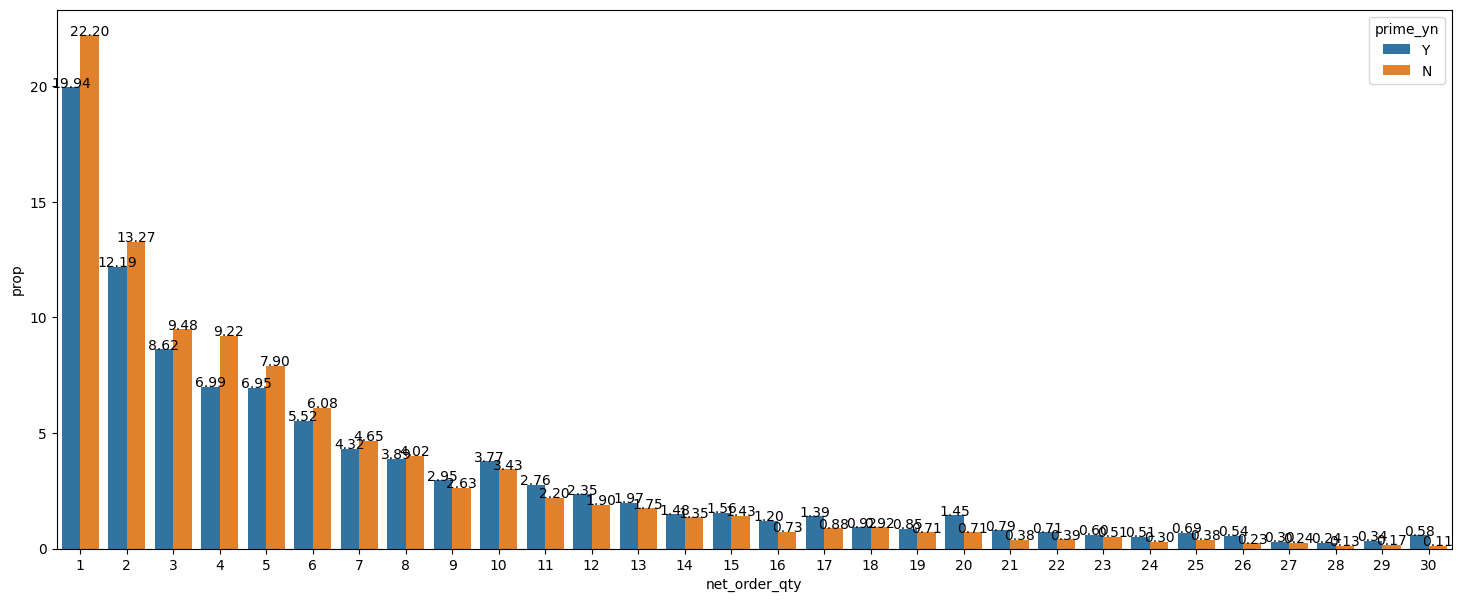

In [72]:
# 수량 합별로 프라임회원, 비프라임 회원 비율의 분포 시각화

fig, ax = plt.subplots(1, figsize=(18, 7))
sns.barplot(x='net_order_qty', y='prop', data=totprime_qty_valcnt, hue='prime_yn')
for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) , p.get_y() + p.get_height(), f"{p.get_height():.2f}", ha = 'center')

In [73]:
print("프라임 회원 중 1월달 구매 수량의 합이 30 이상인 고객의 비율(%): {}".format(prime_qty_valcnt[prime_qty_valcnt['net_order_qty'] > 30]['prop'].sum()))
print("비프라임 회원 중 1월달 구매 수량의 합이 30 이상인 고객의 비율(%): {}".format(nonprime_qty_valcnt[nonprime_qty_valcnt['net_order_qty'] > 30]['prop'].sum()))

프라임 회원 중 1월달 구매 수량의 합이 30 이상인 고객의 비율(%): 3.624413145539906
비프라임 회원 중 1월달 구매 수량의 합이 30 이상인 고객의 비율(%): 1.7079579579579578


-> 주문 상품의 개수가 1~8개일때는, 비프라임 회원이 프라임 회원보다 많지만, 주문 상품 개수가 9개 이상일 때는, 프라임 회원이 비프라임 회원을 앞지르기 시작합니다. (9-30개에서 거의 대부분 프라임 회원의 비율이 많게 나타났으며, 31개 이상 그룹에서도 프라임 회원이 3.62%인 반면 비프라임 회원이 1.70%로 2배 이상 차이나는 분포를 확인할 수 있습니다.)

-> 추후에 파생변수로, 총 주문수량이 9 이상인지를 나타내는 변수를 추가하여 모델링을 진행하면 좋을 것 같습니다.

## 6. 상품별 분석하기 (인기 브랜드 및 카테고리, 임직원/비임직원 대상 상품 확인)

### 6-1. 브랜드별로 파악하기

In [74]:
brands = ['비비고', '햇반', '고메', '백설', '쿡킷',
'The 더건강한', '스팸', '다시다', '해찬들',
'유산균', '한뿌리', '삼호어묵', '하선정',
'행복한콩', '다담', '크레잇', '메티에', '쁘띠첼',
'맥스봉', '맛밤']

In [75]:
brand_df = data[['scd']]
cnt = 0
for brand in brands:
    brand_df[brand] = data.product_name.str.contains(brand)
    l = data.product_name.str.contains(brand).sum()
    print(f'{brand} : {l}')
    cnt += l

비비고 : 11512
햇반 : 6779
고메 : 6814
백설 : 2955
쿡킷 : 226
The 더건강한 : 107
스팸 : 1811
다시다 : 171
해찬들 : 521
유산균 : 168
한뿌리 : 272
삼호어묵 : 107
하선정 : 267
행복한콩 : 837
다담 : 642
크레잇 : 522
메티에 : 28
쁘띠첼 : 667
맥스봉 : 418
맛밤 : 104


비비고, 햇반, 고메, 백설, 스팸 등 cnt가 특정값보다 높은 브랜드를 인기 브랜드로 정의하고, 인기 브랜드에 해당되는 변수를 더미변수로 추가하여 분석을 진행할 예정입니다.

### 6-2. 카테고리 크롤링 및 분석

In [76]:
import requests
from bs4 import BeautifulSoup

# Send a GET request to the website
url = "https://www.cjthemarket.com/pc/spcl-ctgr/detail?spclCtgrId=0022"
response = requests.get(url)

# Create BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(response.text, "html.parser")
nav = soup.find_all('nav')

nav[0].get_text().split('\n\n\n\n\n')

['\n\n\n\n추천 테마',
 '\n겨울 간식꾸러미🎁',
 '\n한파엔 뜨끈요리🔥',
 '\n맛있게 식단해요🍠🍳',
 '\n갓편한끼🍽',
 '\n요린이의 조리교실🍳',
 '\nK-스트릿푸드💛',
 '\n요리고수 필수템🧂',
 '\n쟁여두기템🛒',
 '',
 '\n밥/죽/면\n\n\n햇반\n\n\n컵반\n\n\n볶음밥/주먹밥\n\n\n죽/스프\n\n\n면요리\n\n\n건면/생면/떡\n\n\n식단 관리',
 '국/김치/김/반찬/두부\n\n\n국/탕/찌개\n\n\n김치\n\n\n김\n\n\n생선구이\n\n\n밑반찬\n\n\n두부/어묵/유부/계란류',
 '만두/피자/치킨\n\n\n만두\n\n\n피자\n\n\n치킨/너겟\n\n\n중화식',
 '핫도그/떡볶이/간식\n\n\n핫도그/핫바/맥스봉\n\n\n떡볶이/베이커리/간식\n\n\n맛밤/쁘띠첼\n\n\n과자/아이스크림',
 '돈까스/함박/구이\n\n\n돈까스\n\n\n함박스테이크/미트볼\n\n\n떡갈비/동그랑땡',
 '스팸/닭가슴살/소시지\n\n\n스팸\n\n\n닭가슴살\n\n\n후랑크/비엔나/소시지\n\n\n베이컨/햄/슬라이스',
 '양념/소스/가루/오일\n\n\n소스/드레싱\n\n\n다담/고기양념\n\n\n쿠킹믹스\n\n\n고추장/된장/간장\n\n\n다시다/산들애\n\n\n맛술/식초/액젓\n\n\n설탕/소금/올리고당\n\n\n식용유/참기름\n\n\n밀가루',
 '건강식품\n\n\n유산균\n\n\n비타민\n\n\n눈건강\n\n\n혈행건강\n\n\n피부건강\n\n\n다이어트\n\n\n남성건강\n\n\n활력\n\n\n홍삼/흑삼/건강즙',
 '신선식품\n\n\n과일/채소\n\n\n정육\n\n\n수산',
 '음료/생수/시럽\n\n\n미초\n\n\n청/시럽\n\n\n생수/음료\n\n\n커피',
 '대용량 식자재\n\n\n밀가루/쿠킹믹스\n\n\n설탕/조미료/오일\n\n\n장류/소스\n\n\n냉동식품\n\n\n국/반찬',
 '밀키트\n\n\n쿡킷(지정일배송)\n\n\n쿡킷(일반배송)\n\n\n레스토랑 간편식',
 '\n정기배송

In [77]:
cat = ['\n밥/죽/면\n\n\n햇반\n\n\n컵반\n\n\n볶음밥/주먹밥\n\n\n죽/스프\n\n\n면요리\n\n\n건면/생면/떡\n\n\n식단',
 '국/김치/김/반찬/두부\n\n\n국/탕/찌개\n\n\n김치\n\n\n김\n\n\n생선구이\n\n\n밑반찬\n\n\n두부/어묵/유부/계란',
 '만두/교자/피자/치킨\n\n\n만두\n\n\n피자\n\n\n치킨/너겟\n\n\n중화식',
 '핫도그/떡볶이/간식\n\n\n핫도그/핫바/맥스봉\n\n\n떡볶이/베이커리/간식\n\n\n맛밤/쁘띠첼\n\n\n과자/아이스크림',
 '돈까스/함박/구이\n\n\n돈까스\n\n\n함박스테이크/미트볼\n\n\n떡갈비/동그랑땡',
 '스팸/닭가슴살/소시지\n\n\n스팸\n\n\n닭가슴살\n\n\n후랑크/비엔나/소시지\n\n\n베이컨/햄/슬라이스',
 '양념/소스/가루/오일\n\n\n소스/드레싱\n\n\n다담/고기양념\n\n\n쿠킹믹스\n\n\n고추장/된장/간장\n\n\n다시다/산들애\n\n\n맛술/식초/액젓\n\n\n설탕/소금/올리고당\n\n\n식용유/참기름\n\n\n밀가루',
 '건강식품\n\n\n유산균\n\n\n홍삼/흑삼/건강음료\n\n\n비타민/기초영양\n\n\n다이어트/뷰티',
 '신선식품\n\n\n과일/채소\n\n\n정육\n\n\n수산/냉장',
 '음료/생수/시럽\n\n\n미초\n\n\n청/시럽\n\n\n생수/음료\n\n\n커피']

for i in range(len(cat)):
    c = cat[i].strip().replace('\n\n\n','/').replace('/','|')
    print(c)

밥|죽|면|햇반|컵반|볶음밥|주먹밥|죽|스프|면요리|건면|생면|떡|식단
국|김치|김|반찬|두부|국|탕|찌개|김치|김|생선구이|밑반찬|두부|어묵|유부|계란
만두|교자|피자|치킨|만두|피자|치킨|너겟|중화식
핫도그|떡볶이|간식|핫도그|핫바|맥스봉|떡볶이|베이커리|간식|맛밤|쁘띠첼|과자|아이스크림
돈까스|함박|구이|돈까스|함박스테이크|미트볼|떡갈비|동그랑땡
스팸|닭가슴살|소시지|스팸|닭가슴살|후랑크|비엔나|소시지|베이컨|햄|슬라이스
양념|소스|가루|오일|소스|드레싱|다담|고기양념|쿠킹믹스|고추장|된장|간장|다시다|산들애|맛술|식초|액젓|설탕|소금|올리고당|식용유|참기름|밀가루
건강식품|유산균|홍삼|흑삼|건강음료|비타민|기초영양|다이어트|뷰티
신선식품|과일|채소|정육|수산|냉장
음료|생수|시럽|미초|청|시럽|생수|음료|커피


In [78]:
# 위 데이터에서 중복된 값과 필요한 부분 정리후 category dictionary 제작

def make_catecory_df(data):
    cate_dict = {}
    cate_dict['bab']     = '밥|죽|면|햇반|컵반|볶음밥|주먹밥|죽|스프|건면|생면|떡|식단'
    cate_dict['chan']    = '국|김치|김|반찬|두부|국|탕|찌개|김치|생선|두부|어묵|유부|계란'
    cate_dict['dimsum']  = '만두|교자|피자|치킨|만두|피자|치킨|너겟|중화'
    cate_dict['snack']   = '핫도그|떡볶이|간식|핫도그|핫바|맥스봉|떡볶이|베이커리|간식|맛밤|쁘띠첼|과자|아이스크림'
    cate_dict['don']     = '돈까스|함박|구이|돈까스|스테이크|미트볼|떡갈비|동그랑땡'
    cate_dict['ham']     = '스팸|닭가슴살|소시지|닭가슴살|후랑크|비엔나|소시지|베이컨|햄|슬라이스'
    cate_dict['sauce']   = '양념|소스|가루|오일|소스|드레싱|다담|믹스|고추장|된장|간장|다시다|산들애|맛술|식초|액젓|설탕|소금|올리고당|식용유|참기름|밀가루'
    cate_dict['healthy'] = '건강|유산균|홍삼|흑삼|건강음료|비타민|영양|다이어트|뷰티'
    #cate_dict['fresh']   = '신선|과일|채소|정육|수산|냉장'
    cate_dict['drink']   = '음료|생수|시럽|미초|청|시럽|생수|음료|커피'

    cate_df = data[['scd']]
    for k in cate_dict:
        #print(k, cate_dict[k])
        cate_df[k] = data.product_name.str.contains(cate_dict[k])
    return cate_df

In [79]:
cate_df = make_catecory_df(data)

In [80]:
# 다음과 같이 각 카테고리별로 분석하는 작업을 진행할 예정입니다.

cate_df

,scd,bab,chan,dimsum,snack,don,ham,sauce,healthy,drink
0,20230124153976,False,False,False,False,False,False,False,False,False
1,20230124155563,False,False,False,False,False,True,False,False,False
2,20230125158386,False,False,True,False,False,False,False,False,False
3,20230126164638,False,True,False,False,False,False,False,False,False
4,20230125159705,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
45870,20230102972321,False,False,False,True,False,False,False,False,False
45871,20230102972720,False,True,False,False,False,False,True,False,False
45872,20230101964953,False,True,False,False,False,False,True,False,False
45873,20230101970142,False,False,False,False,True,False,False,False,False


### 6-3.  임직원과 일반 고객 데이터 상품 차이 확인

In [81]:
cus_idx = normal.index

txt = ', '.join(data.loc[cus_idx].product_name.tolist())

# 앞 뒤 괄호까지 붙여서 추출
p = re.compile('\[[^]]+\]')
m = p.findall(txt)
print(set(m))

{'[앱전용특가]', '[1000개한정]', '[1000개한정미정당 스파이시로제떡볶이 376gx2개, [200개한정]', '[2300개한정]', '[400개한정]', '[1400개한정 ]', '[900개한정]', '[Q팩]', '[23설 선물세트 히든특가]', '[침착맨 SET]', '[고메x덕후선생]', '[사은품]', '[CJ공식몰_23설선물세트특가]', '[500개한정]', '[UPCYCLE]', '[2023설임직원캠페인특가]', '[쿡킷]', '[침착맨]', '[200개 한정]', '[1000개한정미정당 스파이시로제떡볶이 376gx2개, 비비고 사골곰탕 500gX18개(1box), [500개한정]', '[1BOX]', '[2023설선물세트대량구매]', '[300개한정]', '[1000개한정미정당 스파이시로제떡볶이 376gx2개, 비비고 잔칫집모둠잡채644g, 비비고 잔칫집모둠잡채644g, 비비고 왕교자 420g, 백설 토마토스파게티소스610g, 비비고 바삭군교자 360g*2, 햇반솥반 전복내장영양밥 200g, 비비고 언양식 바싹불고기 460g, 비비고 소고기무국 500g, 고메 중화짬뽕 652g, 햇반쿡반 치킨갈릭마요주먹밥 500g, 비비고 김치 왕교자 420gx2개, 비비고 왕교자 1.05kg, 둥근햇반 210gx3입, 고메치킨 핫스파이시 550g, [UPCYCLE]', '[200개한정]', '[깜짝특가]', '[2023설사원선물신청]', '[1000개한정미정당 스파이시로제떡볶이 376gx2개, [500개한정]', '[bibigo table]', '[2023설임직원캠페인대량구매]', '[2000개한정]', '[식물성]', '[2023설임직원캠페인]', '[100개한정]', '[Special Course]', '[1600개한정]', '[2023설선물세트]', '[CJ더마켓ONLY]', '[700개한정]', '[냉동]', '[800개한정]', '[새벽배송]', '[600개한정]', '[택배배송]'}


In [82]:
emp_idx = employee.index

emp_txt = ', '.join(data.loc[emp_idx].product_name.tolist())

# 앞 뒤 괄호까지 붙여서 추출
p = re.compile('\[[^]]+\]')
em = p.findall(emp_txt)
print(set(em))

{'[26%선할인적용]', '[앱전용특가]', '[49%선할인적용]', '[비비고 셰프컬렉션]', '[증정]', '[침착맨 SET]', '[고메x덕후선생]', '[사은품]', '[CJ공식몰_23설선물세트특가]', '[UPCYCLE]', '[2023설임직원캠페인특가]', '[쿡킷]', '[53%선할인적용]', '[눈건강]', '[침착맨]', '[23설 임직원 단독]', '[1BOX]', '[56%선할인적용]', '[임직원]', '[2023설사원선물신청]', '[2023설임직원캠페인]', '[식물성]', '[Special Course]', '[유산균]', '[냉동]', '[2023설선물세트]', '[58%선할인적용]', '[50%선할인적용]', '[새벽배송]', '[택배배송]', '[60%선할인적용]', '[피부건강]'}


In [83]:
from collections import Counter
Counter(m)

Counter({'[UPCYCLE]': 303,
         '[택배배송]': 12,
         '[600개한정]': 100,
         '[500개한정]': 872,
         '[300개한정]': 123,
         '[800개한정]': 8,
         '[1000개한정]': 136,
         '[100개한정]': 44,
         '[1400개한정 ]': 13,
         '[2000개한정]': 35,
         '[700개한정]': 20,
         '[400개한정]': 48,
         '[새벽배송]': 6,
         '[쿡킷]': 6,
         '[200개한정]': 80,
         '[bibigo table]': 9,
         '[900개한정]': 7,
         '[200개 한정]': 4,
         '[침착맨]': 11,
         '[식물성]': 13,
         '[1600개한정]': 14,
         '[1000개한정미정당 스파이시로제떡볶이 376gx2개, [200개한정]': 1,
         '[고메x덕후선생]': 1,
         '[Special Course]': 3,
         '[1000개한정미정당 스파이시로제떡볶이 376gx2개, [500개한정]': 1,
         '[1000개한정미정당 스파이시로제떡볶이 376gx2개, 비비고 사골곰탕 500gX18개(1box), [500개한정]': 1,
         '[2300개한정]': 1,
         '[CJ더마켓ONLY]': 1,
         '[Q팩]': 1,
         '[CJ공식몰_23설선물세트특가]': 212,
         '[2023설선물세트]': 154,
         '[1BOX]': 47,
         '[깜짝특가]': 114,
         '[2023설임직원캠페인특가]': 13,
         '[2023

In [84]:
Counter(em)

Counter({'[UPCYCLE]': 224,
         '[임직원]': 336,
         '[사은품]': 18,
         '[새벽배송]': 24,
         '[쿡킷]': 23,
         '[냉동]': 4,
         '[2023설사원선물신청]': 1228,
         '[56%선할인적용]': 1,
         '[택배배송]': 7,
         '[고메x덕후선생]': 2,
         '[26%선할인적용]': 1,
         '[침착맨]': 6,
         '[Special Course]': 3,
         '[증정]': 1,
         '[눈건강]': 1,
         '[49%선할인적용]': 2,
         '[60%선할인적용]': 2,
         '[피부건강]': 1,
         '[유산균]': 1,
         '[2023설선물세트]': 62,
         '[23설 임직원 단독]': 91,
         '[2023설임직원캠페인]': 13,
         '[2023설임직원캠페인특가]': 4,
         '[침착맨 SET]': 3,
         '[앱전용특가]': 36,
         '[1BOX]': 9,
         '[CJ공식몰_23설선물세트특가]': 1,
         '[식물성]': 6,
         '[50%선할인적용]': 2,
         '[비비고 셰프컬렉션]': 1,
         '[53%선할인적용]': 2,
         '[58%선할인적용]': 1})

-> 주로 비임직원(일반 고객) 대상으로 하는 행사는 "한정" 행사이며, 임직원 대상으로 하는 행사는 "선할인" 등임을 알 수 있으며, 각 행사별로 구분하는 더미 변수를 만들어, 프라임/비프라임 회원을 예측하는 모델링에 활용해보면 좋을 것 같습니다.

### 6-4. 인기상품 분석 (가설 5 검정)

In [85]:
from collections import Counter

In [86]:
data['product_list'] = data['product_name'].str.split(r'\+')
data['product_cnt'] = data['product_list'].apply(lambda x: len(x))
pl = [i for ix in data.product_list.tolist() for i in ix]
pl_counter = Counter(pl)

In [87]:
data

,Unnamed: 0,scd,product_name,net_order_qty,net_order_amt,gender,age_grp,employee_yn,order_date,prime_yn,date,day_of_week,product_list,product_cnt
0,0,20230124153976,잔칫집 식혜 240ml 30입,1,9.803170,F,2,Y,20230124,N,24,3,[잔칫집 식혜 240ml 30입],1
1,1,20230124155563,백설 한입쏙 비엔나 120g*2,1,8.256607,M,3,Y,20230124,N,24,3,[백설 한입쏙 비엔나 120g*2],1
2,2,20230125158386,비비고 왕교자 1.05kg,1,9.348449,F,4,N,20230125,N,25,4,[비비고 왕교자 1.05kg],1
3,3,20230126164638,고메 바삭쫄깃한 탕수육 900g,1,9.667259,F,4,N,20230126,Y,26,5,[고메 바삭쫄깃한 탕수육 900g],1
4,4,20230125159705,햇반 매일잡곡밥210g,20,9.994653,M,4,N,20230125,Y,25,4,[햇반 매일잡곡밥210g],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45870,45870,20230102972321,고메 거멍 모짜체다핫도그 340g,1,8.648397,M,5,Y,20230102,Y,2,2,[고메 거멍 모짜체다핫도그 340g],1
45871,45871,20230102972720,[앱전용특가]비비고 차돌된장찌개 460gX4개,1,9.639327,F,3,N,20230102,N,2,2,[[앱전용특가]비비고 차돌된장찌개 460gX4개],1
45872,45872,20230101964953,[앱전용특가]비비고 차돌된장찌개 460gX4개,1,9.639327,F,4,N,20230101,N,1,1,[[앱전용특가]비비고 차돌된장찌개 460gX4개],1
45873,45873,20230101970142,[식물성]고메 플랜테이블 함박스테이크 150g,1,7.939872,M,4,Y,20230101,Y,1,1,[[식물성]고메 플랜테이블 함박스테이크 150g],1


In [88]:
pl_counter

Counter({'잔칫집 식혜 240ml 30입': 7,
         '백설 한입쏙 비엔나 120g*2': 55,
         '비비고 왕교자 1.05kg': 325,
         '고메 바삭쫄깃한 탕수육 900g': 53,
         '햇반 매일잡곡밥210g': 2,
         '[UPCYCLE]햇반 흑미밥 210gx24개(1box)': 133,
         '햇반 매일찰잡곡밥 210g': 2,
         '맥스봉 체다치즈어랏400g (20g*20EA)': 7,
         '고메 바삭쫄깃한 사천탕수육 450g': 51,
         '고메 콘크림수프 180g*4입': 25,
         '더건강한 닭가슴살 소시지120g': 27,
         '비비고 도톰해물완자 795g': 67,
         '가쓰오얼큰우동2인분': 14,
         '고메 치즈크리스피핫도그 340g': 122,
         '비비고 깻잎고기만두400g*2': 133,
         '행복한콩 2가지로만 국산콩두부 부침용 300g': 27,
         '고메 칠리감바스 피자 350g': 43,
         '사골곰탕 한 그릇 100g (1-2인분X5개입)': 8,
         '고메 중화짬뽕 652g': 240,
         '고메 포테이토치즈 핫도그400g': 113,
         '하선정 다진마늘 250g': 50,
         '햇반 쿡반 불닭마요주먹밥 500g': 26,
         '해찬들 우리쌀로 만든 태양초골드고추장 2kg': 25,
         '비비고 사골곰탕 500g': 305,
         '비비고 시원바지락칼국수642g (2인분)': 114,
         '미트마스터 한돈 삼겹살 300g x 2팩_패밀리데이': 5,
         '햇반 컵반 김치날치알밥 188g': 43,
         '고메 함박스테이크 152g': 123,
         '고메 브로콜리크림수프

In [89]:
pop_product = pd.DataFrame(pl_counter.most_common(100), columns=['product_name','cnt'])
pop_product

,product_name,cnt
0,비비고 왕교자 1.05kg,325
1,[1000개한정]비비고 왕교자 1.05kgX2개,309
2,비비고 사골곰탕 500g,305
3,고메 바삭튀겨낸통등심돈카츠450g,271
4,비비고 사골곰탕 500gX18개(1box),254
...,...,...
95,[500개한정]비비고 진한김치만두400g*2X2개,83
96,비비고 진국설렁탕 500g,83
97,비비고 차돌육개장 500g,81
98,햇반 솥반 꿀약밥 210g,81


In [90]:
data['pop_product'] = data.product_name.isin(pop_product.product_name)

In [91]:
data[data['pop_product'] == True].prime_yn.value_counts()

N    6196
Y    5579
Name: prime_yn, dtype: int64

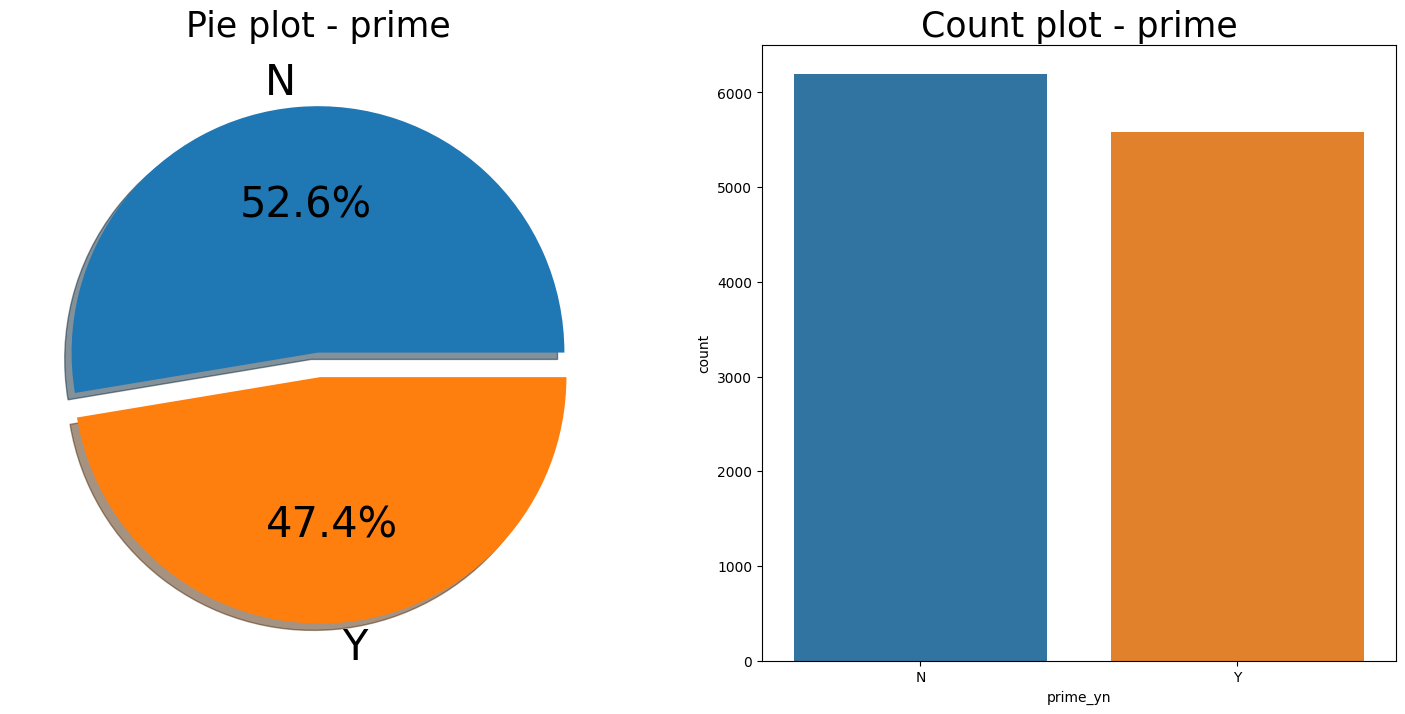

In [92]:
# 전체에서 인기 상품을 구매한 주문 중 프라임 회원 주문의 비율 (약 47.4%)

f, ax =plt.subplots(1,2, figsize =(18,8))
data[data['pop_product'] == True]['prime_yn'].value_counts().plot.pie(explode=[0,0.1],
                                            autopct = '%1.1f%%', ax=ax[0], shadow =True, fontsize=30)
ax[0].set_title('Pie plot - prime', size = 25)
ax[0].set_ylabel('')
sns.countplot(x='prime_yn', data=data[data['pop_product'] == True], ax = ax[1])
ax[1].set_title('Count plot - prime',  size = 25)
plt.show()

In [93]:
data[data['pop_product'] == False].prime_yn.value_counts()

Y    19075
N    15025
Name: prime_yn, dtype: int64

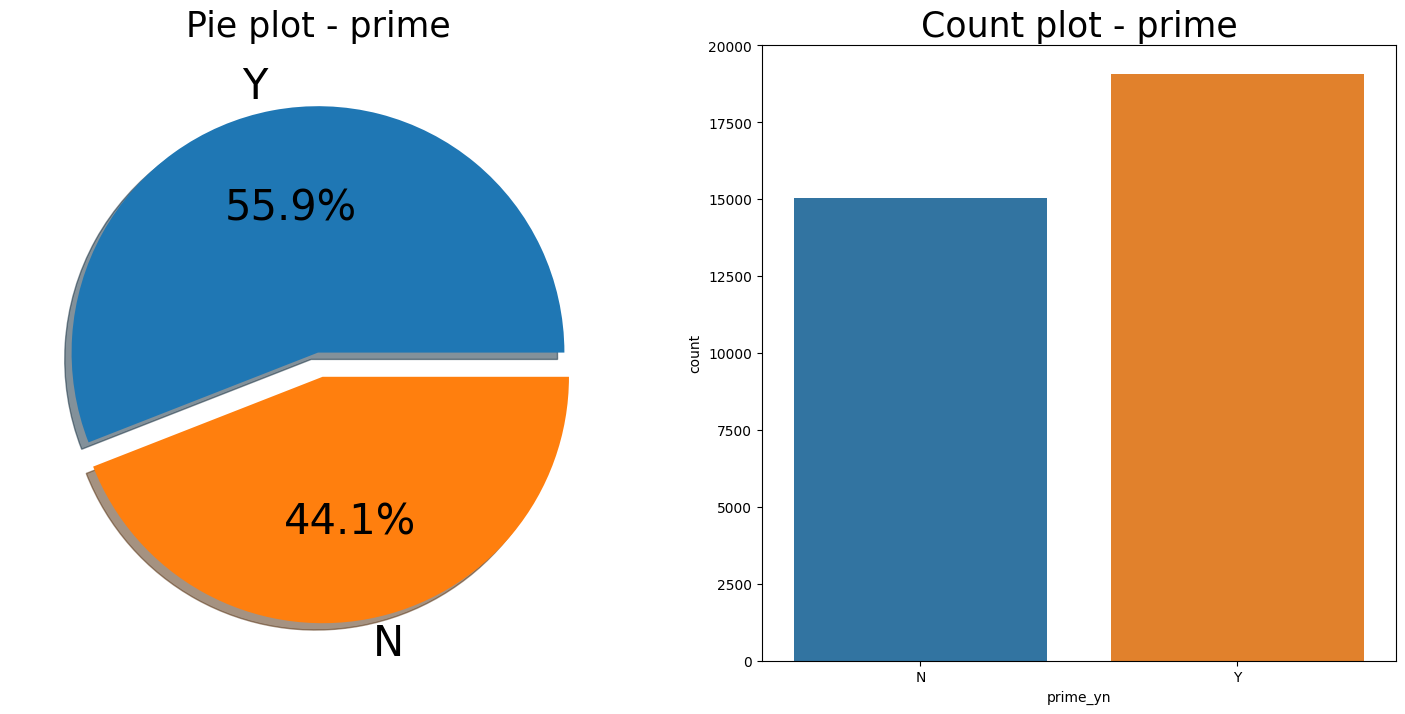

In [94]:
# 전체에서 인기 상품이 아닌 주문 중 프라임 회원 주문의 비율 (약 55.9%)

f, ax =plt.subplots(1,2, figsize =(18,8))
data[data['pop_product'] == False]['prime_yn'].value_counts().plot.pie(explode=[0,0.1],
                                            autopct = '%1.1f%%', ax=ax[0], shadow =True, fontsize=30)
ax[0].set_title('Pie plot - prime', size = 25)
ax[0].set_ylabel('')
sns.countplot(x='prime_yn', data=data[data['pop_product'] == False], ax = ax[1])
ax[1].set_title('Count plot - prime',  size = 25)
plt.show()

In [95]:
data[(data['employee_yn'] == 'Y') & (data['pop_product'] == True)].prime_yn.value_counts()

Y    1990
N    1371
Name: prime_yn, dtype: int64

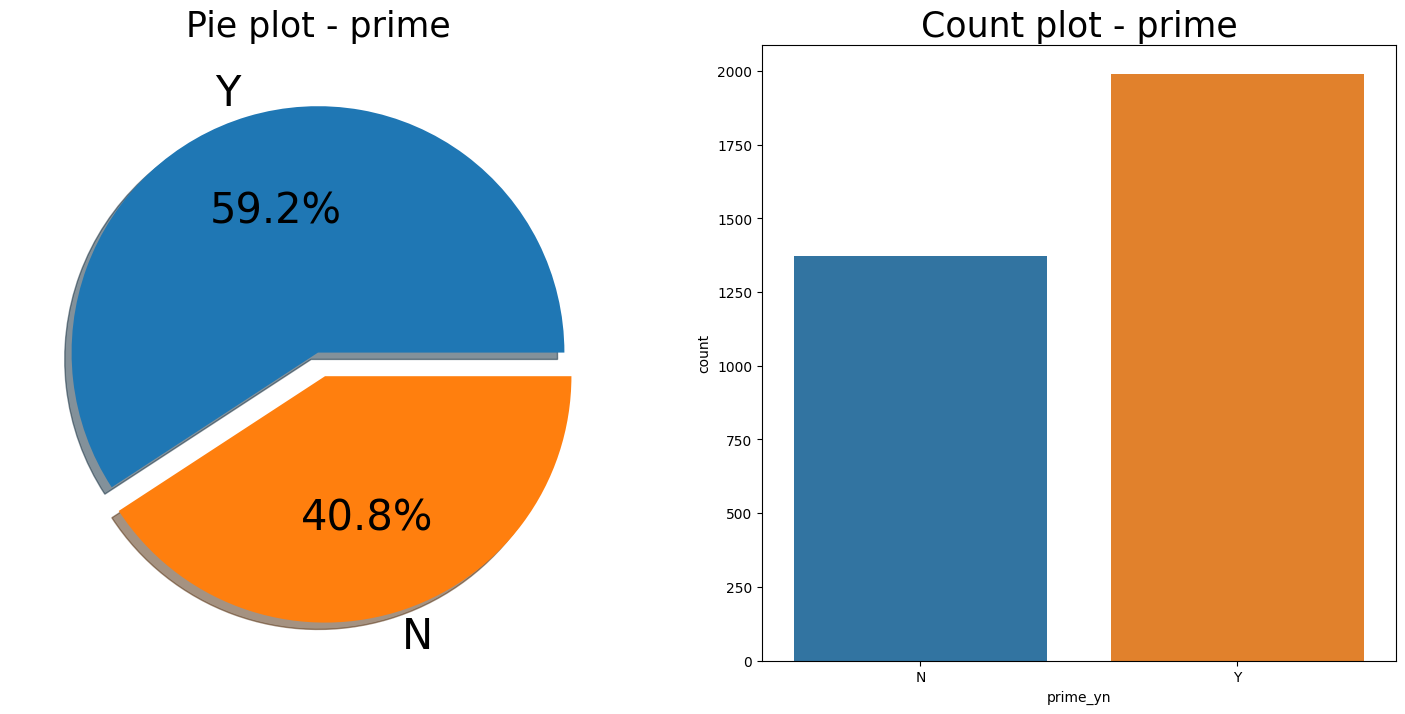

In [98]:
# 임직원의 주문 중 인기 상품인 주문의 프라임 회원의 주문인 비율 (약 59.2%)

f, ax =plt.subplots(1,2, figsize =(18,8))
data[(data['employee_yn'] == 'Y') & (data['pop_product'] == True)]['prime_yn'].value_counts().plot.pie(explode=[0,0.1],
                                            autopct = '%1.1f%%', ax=ax[0], shadow =True, fontsize=30)
ax[0].set_title('Pie plot - prime', size = 25)
ax[0].set_ylabel('')
sns.countplot(x='prime_yn', data=data[(data['employee_yn'] == 'Y') & (data['pop_product'] == True)], ax = ax[1])
ax[1].set_title('Count plot - prime',  size = 25)
plt.show()

In [99]:
data[(data['employee_yn'] == 'Y') & (data['pop_product'] == False)].prime_yn.value_counts()

Y    10431
N     6013
Name: prime_yn, dtype: int64

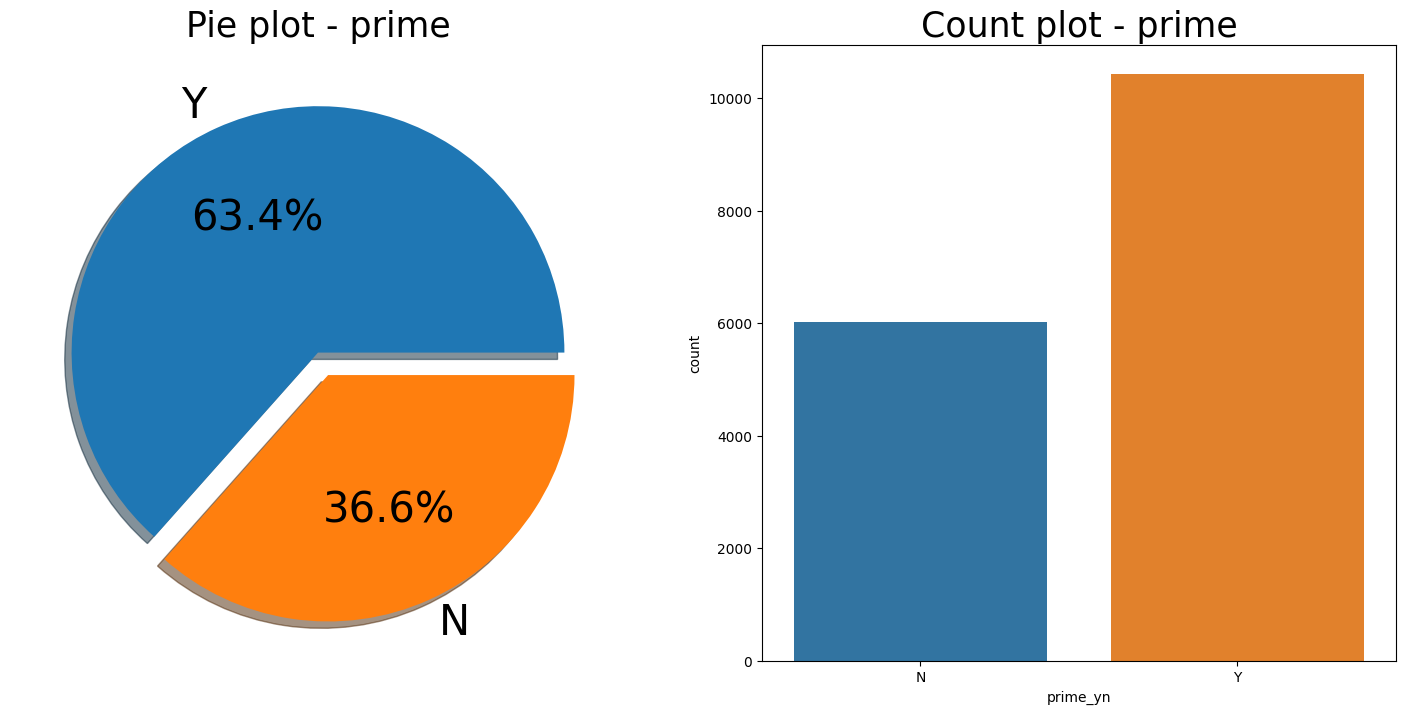

In [100]:
# 임직원의 주문 중 인기 상품이 아닌 주문의 프라임 회원의 주문인 비율 (약 63.4%)

f, ax =plt.subplots(1,2, figsize =(18,8))
data[(data['employee_yn'] == 'Y') & (data['pop_product'] == False)]['prime_yn'].value_counts().plot.pie(explode=[0,0.1],
                                            autopct = '%1.1f%%', ax=ax[0], shadow =True, fontsize=30)
ax[0].set_title('Pie plot - prime', size = 25)
ax[0].set_ylabel('')
sns.countplot(x='prime_yn', data=data[(data['employee_yn'] == 'Y') & (data['pop_product'] == False)], ax = ax[1])
ax[1].set_title('Count plot - prime',  size = 25)
plt.show()

In [101]:
data[(data['employee_yn'] == 'N') & (data['pop_product'] == True)].prime_yn.value_counts()

N    4825
Y    3589
Name: prime_yn, dtype: int64

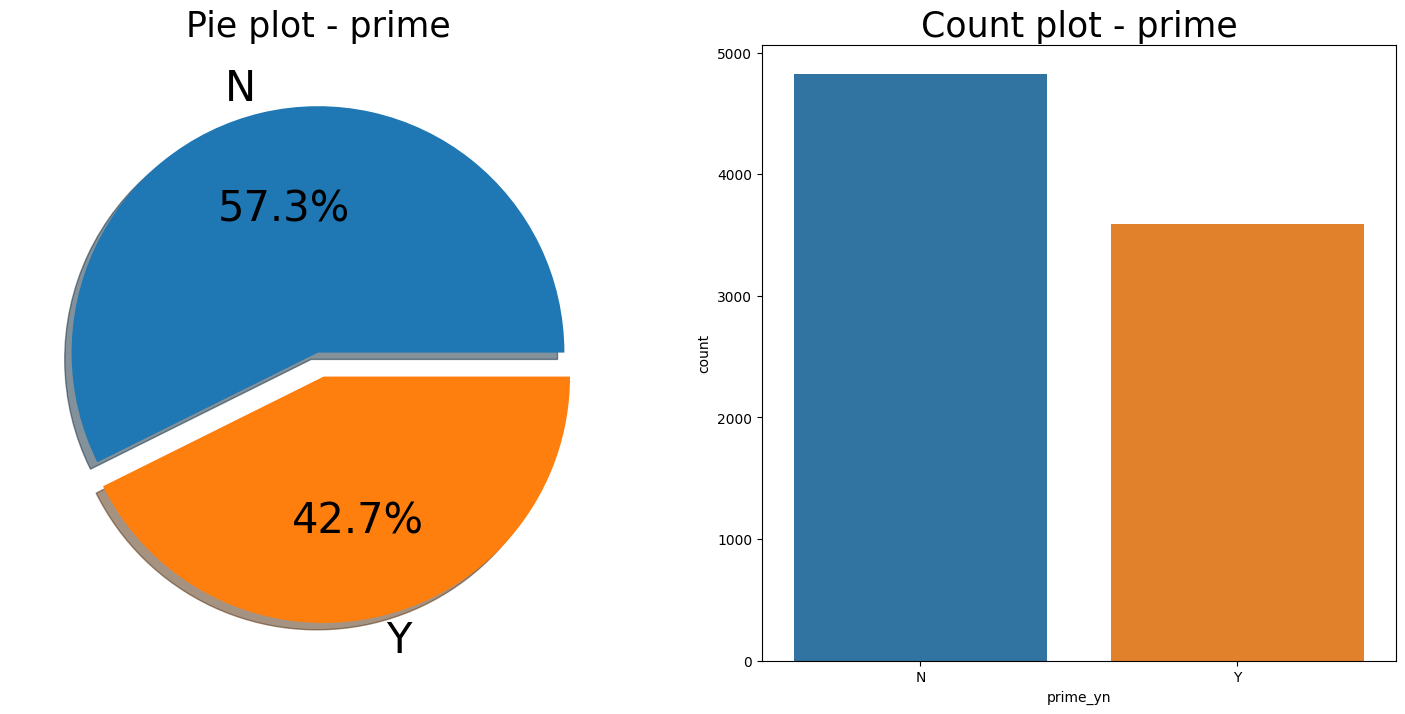

In [102]:
# 비임직원의 주문 중 인기 상품인 주문의 프라임 회원의 주문인 비율 (약 42.7%)

f, ax =plt.subplots(1,2, figsize =(18,8))
data[(data['employee_yn'] == 'N') & (data['pop_product'] == True)]['prime_yn'].value_counts().plot.pie(explode=[0,0.1],
                                            autopct = '%1.1f%%', ax=ax[0], shadow =True, fontsize=30)
ax[0].set_title('Pie plot - prime', size = 25)
ax[0].set_ylabel('')
sns.countplot(x='prime_yn', data=data[(data['employee_yn'] == 'N') & (data['pop_product'] == True)], ax = ax[1])
ax[1].set_title('Count plot - prime',  size = 25)
plt.show()

In [103]:
data[(data['employee_yn'] == 'N') & (data['pop_product'] == False)].prime_yn.value_counts()

N    9012
Y    8644
Name: prime_yn, dtype: int64

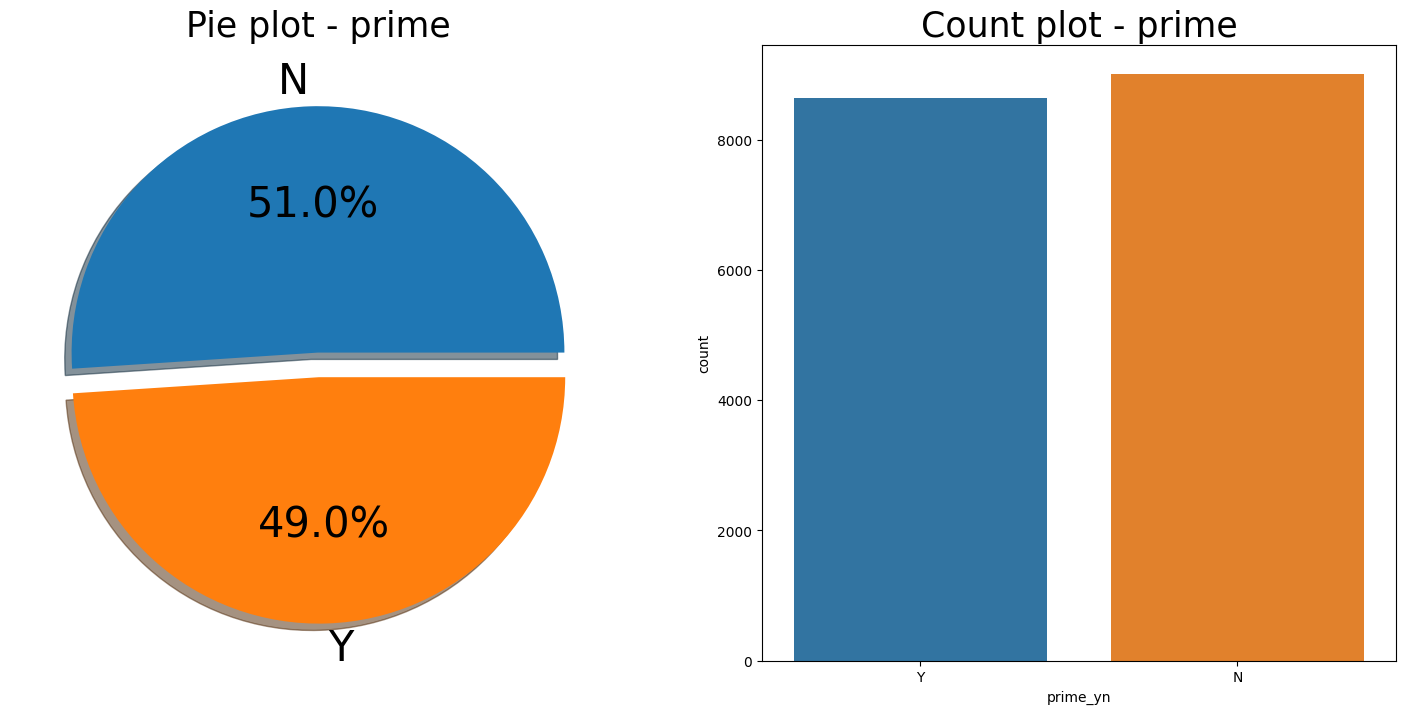

In [104]:
# 비임직원의 주문 중 인기 상품이 아닌 주문의 프라임 회원의 주문인 비율 (약 49.0%)

f, ax =plt.subplots(1,2, figsize =(18,8))
data[(data['employee_yn'] == 'N') & (data['pop_product'] == False)]['prime_yn'].value_counts().plot.pie(explode=[0,0.1],
                                            autopct = '%1.1f%%', ax=ax[0], shadow =True, fontsize=30)
ax[0].set_title('Pie plot - prime', size = 25)
ax[0].set_ylabel('')
sns.countplot(x='prime_yn', data=data[(data['employee_yn'] == 'N') & (data['pop_product'] == False)], ax = ax[1])
ax[1].set_title('Count plot - prime',  size = 25)
plt.show()

-> 분석 결과, 오히려 프라임 회원들은 인기 상품보다 비인기 상품을 더 많이 사는 경향이 있습니다.

-> 가설과는 반대의 결과가 나왔으며, 이는 프라임 고객 보다 신규 고객이 인기 상품을 사는 경향으로 해석할 수 있을 것 같습니다.

-> 추후 모델링에 들어가기에 앞서, 인기 상품인지를 나타내는 파생변수를 추가할 예정입니다.

## 7. 가설 6. "프라임 회원의 최종 구매 금액이 비프라임 회원보다 더 높을 것이다" 검정

In [105]:
scd_noduplicates.set_index('scd', inplace=True)
scd_noduplicates['tot_amt'] = data.groupby('scd')['net_order_amt'].sum()

In [106]:
scd_noduplicates

,Unnamed: 0,product_name,net_order_qty,net_order_amt,gender,age_grp,employee_yn,order_date,prime_yn,tot_amt
scd,,,,,,,,,,
20230124153976,0,잔칫집 식혜 240ml 30입,1,9.803170,F,2,Y,20230124,N,92.801653
20230124155563,1,백설 한입쏙 비엔나 120g*2,1,8.256607,M,3,Y,20230124,N,147.475732
20230125158386,2,비비고 왕교자 1.05kg,1,9.348449,F,4,N,20230125,N,9.348449
20230126164638,3,고메 바삭쫄깃한 탕수육 900g,1,9.667259,F,4,N,20230126,Y,27.692838
20230125159705,4,햇반 매일잡곡밥210g,20,9.994653,M,4,N,20230125,Y,73.736585
...,...,...,...,...,...,...,...,...,...,...
20230101969653,45854,리턴업 갱년기케어 500mgX60캡슐(1개월)X2개,1,10.449149,M,2,N,20230101,N,10.449149
20230101966525,45855,비비고 순살 고등어구이 60g,9,10.112613,M,3,N,20230101,N,10.112613
20230102975115,45860,[2023설사원선물신청] 흑삼정 골드클래스 100gx2,1,11.597276,M,5,Y,20230102,N,11.597276


In [107]:
# 프라임 회원과 비프라임 회원의 최종 구매 금액의 평균수치 비교
scd_noduplicates.groupby('prime_yn')['tot_amt'].mean()

prime_yn
N    36.487675
Y    42.202239
Name: tot_amt, dtype: float64

In [108]:
# 프라임 회원과 비프라임 회원의 최종 구매 금액의 최대수치 비교
scd_noduplicates.groupby('prime_yn')['tot_amt'].max()

prime_yn
N    369.401760
Y    488.565128
Name: tot_amt, dtype: float64

In [109]:
# 프라임 회원과 비프라임 회원의 최종 구매 금액의 최소수치 비교
scd_noduplicates.groupby('prime_yn')['tot_amt'].min()

prime_yn
N    6.552508
Y    7.113142
Name: tot_amt, dtype: float64

<Axes: xlabel='prime_yn', ylabel='tot_amt'>

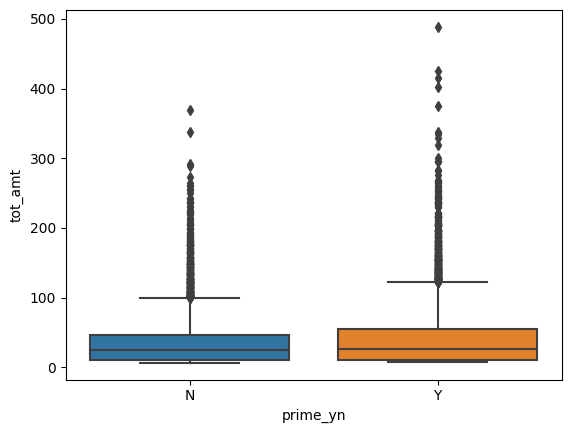

In [110]:
sns.boxplot(data=scd_noduplicates, x='prime_yn', y='tot_amt')

# 데이터셋 전처리

## 1. 데이터 불러오기

먼저 train, test 데이터를 각각 불러와서, 하나의 데이터셋으로 합치겠습니다. (prime_yn이 있는 데이터가 train 데이터, prime_yn이 결측값인 데이터가 test 데이터입니다.)

In [111]:
train_data = pd.read_csv(ROOT_DIR +'tmk_bda_train.csv', index_col=0)
test_data = pd.read_csv(ROOT_DIR +'tmk_bda_test.csv', index_col=0)

In [112]:
data = pd.concat([train_data, test_data])

In [113]:
data.head()

,scd,product_name,net_order_qty,net_order_amt,gender,age_grp,employee_yn,order_date,prime_yn
0,20230124153976,잔칫집 식혜 240ml 30입,1,9.803170,F,2,Y,20230124,N
1,20230124155563,백설 한입쏙 비엔나 120g*2,1,8.256607,M,3,Y,20230124,N
2,20230125158386,비비고 왕교자 1.05kg,1,9.348449,F,4,N,20230125,N
3,20230126164638,고메 바삭쫄깃한 탕수육 900g,1,9.667259,F,4,N,20230126,Y
4,20230125159705,햇반 매일잡곡밥210g,20,9.994653,M,4,N,20230125,Y


## 2. 'is_price_lower_than_avg' 추가하기

['상품명', '수량'] 으로 그룹화하여, net_order_amt(거래 가격)을 전체적으로 평균내어, 평균보다 싼 가격에 판매했는지를 나타내는 'is_price_lower_than_avg' 라는 변수를 추가해 주겠습니다.

In [114]:
data_avg_amt = data.groupby(['product_name', 'net_order_qty'])['net_order_amt'].mean().to_frame().reset_index()
data_avg_amt

,product_name,net_order_qty,net_order_amt
0,(냉동) 비비고 테이블 특 선물세트 (특양지곰탕700gx2개+특설렁탕700gx1개),1,10.246661
1,(냉동) 비비고 테이블 특 선물세트 (특양지곰탕700gx2개+특설렁탕700gx1개),2,10.914124
2,(냉동) 비비고 테이블 특설렁탕 700g,1,8.865646
3,(냉동) 비비고 테이블 특설렁탕 700g,2,9.687645
4,(냉동) 비비고 테이블 특설렁탕 700g,3,9.879576
...,...,...,...
8344,헬씨누리 침향환 환심 10환X6입(1BOX)_패밀리데이,1,11.091499
8345,헬씨누리 침향환 환심 10환X6입(1BOX)_행사,1,11.059637
8346,훈제대란 20구,1,9.196786
8347,훈제대란 20구,2,9.851155


In [115]:
data = pd.merge(data, data_avg_amt, on=['product_name', 'net_order_qty'])
data.rename(columns={'net_order_amt_x' : 'net_order_amt', 'net_order_amt_y' : 'prd_name_qty_avg_amt'}, inplace=True)
data

,scd,product_name,net_order_qty,net_order_amt,gender,age_grp,employee_yn,order_date,prime_yn,prd_name_qty_avg_amt
0,20230124153976,잔칫집 식혜 240ml 30입,1,9.803170,F,2,Y,20230124,N,9.773273
1,20230126173271,잔칫집 식혜 240ml 30입,1,9.803170,M,4,Y,20230126,N,9.773273
2,20230115112981,잔칫집 식혜 240ml 30입,1,9.755336,M,2,Y,20230115,Y,9.773273
3,20230113092350,잔칫집 식혜 240ml 30입,1,9.755336,M,3,Y,20230113,Y,9.773273
4,20230111076505,잔칫집 식혜 240ml 30입,1,9.755336,F,2,Y,20230111,Y,9.773273
...,...,...,...,...,...,...,...,...,...,...
65530,20230114102996,리턴업 아이시안 루테인 오메가3(1개월)X2개,5,11.877576,M,2,Y,20230114,NaN,11.877576
65531,20230113091844,4無 맛 단무지 260g,3,8.049746,F,6,N,20230113,NaN,8.049746
65532,20230114099157,[2023설사원선물신청] 스팸고급유SE호,5,11.472791,M,3,Y,20230114,NaN,11.472791
65533,20230103992088,[2023설사원선물신청]청도 반건시 선물세트 1.5kg,6,12.476867,M,3,Y,20230103,NaN,12.476867


In [116]:
data['is_price_lower_than_avg'] = data['net_order_amt'] < data['prd_name_qty_avg_amt']
data.head()

,scd,product_name,net_order_qty,net_order_amt,gender,age_grp,employee_yn,order_date,prime_yn,prd_name_qty_avg_amt,is_price_lower_than_avg
0,20230124153976,잔칫집 식혜 240ml 30입,1,9.803170,F,2,Y,20230124,N,9.773273,False
1,20230126173271,잔칫집 식혜 240ml 30입,1,9.803170,M,4,Y,20230126,N,9.773273,False
2,20230115112981,잔칫집 식혜 240ml 30입,1,9.755336,M,2,Y,20230115,Y,9.773273,True
3,20230113092350,잔칫집 식혜 240ml 30입,1,9.755336,M,3,Y,20230113,Y,9.773273,True
4,20230111076505,잔칫집 식혜 240ml 30입,1,9.755336,F,2,Y,20230111,Y,9.773273,True


In [117]:
# 필요한 변수만 남기기 위해, 평균 거래 가격이라는 변수는 제거해줍니다.
data = data.drop('prd_name_qty_avg_amt', axis=1)

## 3. 'order_date' 관련 파생 변수 추가하기

해당 거래가 1-2, 13-17, 25-31일에 거래되었는지, 연휴인지, 어느 요일에 이루어졌는지를 나타내는 파생변수를 다음 코드를 통해 추가해주겠습니다.

In [118]:
def date_preprocessing(data):
    data['date'] = data.order_date % 100
    data['day_of_week'] = data.date % 7

    # 공휴일(1/1 신정, 1/21~24 설연휴 추가 후 'holiday')
    data.loc[data['date'].isin([1,21,22,23,24]) ,'holiday'] = 1
    data.holiday.fillna(0, inplace=True)
    data.holiday = data.holiday.astype(int)

    data['date_1_to_2'] = data['date'].isin([1,2]).astype(int)
    data['date_13_to_17'] = data['date'].isin([13,17]).astype(int)
    data['date_25_to_31'] = data['date'].isin([25,31]).astype(int)
    return data.drop('date', axis=1)

In [119]:
data = date_preprocessing(data)

In [120]:
data.head()

,scd,product_name,net_order_qty,net_order_amt,gender,age_grp,employee_yn,order_date,prime_yn,is_price_lower_than_avg,day_of_week,holiday,date_1_to_2,date_13_to_17,date_25_to_31
0,20230124153976,잔칫집 식혜 240ml 30입,1,9.803170,F,2,Y,20230124,N,False,3,1,0,0,0
1,20230126173271,잔칫집 식혜 240ml 30입,1,9.803170,M,4,Y,20230126,N,False,5,0,0,0,0
2,20230115112981,잔칫집 식혜 240ml 30입,1,9.755336,M,2,Y,20230115,Y,True,1,0,0,0,0
3,20230113092350,잔칫집 식혜 240ml 30입,1,9.755336,M,3,Y,20230113,Y,True,6,0,0,1,0
4,20230111076505,잔칫집 식혜 240ml 30입,1,9.755336,F,2,Y,20230111,Y,True,4,0,0,0,0


## 4. category crawling 및 파생변수 만들기

In [121]:
import requests
from bs4 import BeautifulSoup

# Send a GET request to the website
url = "https://www.cjthemarket.com/pc/spcl-ctgr/detail?spclCtgrId=0022"
response = requests.get(url)

# Create BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(response.text, "html.parser")
nav = soup.find_all('nav')

nav[0].get_text().split('\n\n\n\n\n')

['\n\n\n\n추천 테마',
 '\n겨울 간식꾸러미🎁',
 '\n한파엔 뜨끈요리🔥',
 '\n맛있게 식단해요🍠🍳',
 '\n갓편한끼🍽',
 '\n요린이의 조리교실🍳',
 '\nK-스트릿푸드💛',
 '\n요리고수 필수템🧂',
 '\n쟁여두기템🛒',
 '',
 '\n밥/죽/면\n\n\n햇반\n\n\n컵반\n\n\n볶음밥/주먹밥\n\n\n죽/스프\n\n\n면요리\n\n\n건면/생면/떡\n\n\n식단 관리',
 '국/김치/김/반찬/두부\n\n\n국/탕/찌개\n\n\n김치\n\n\n김\n\n\n생선구이\n\n\n밑반찬\n\n\n두부/어묵/유부/계란류',
 '만두/피자/치킨\n\n\n만두\n\n\n피자\n\n\n치킨/너겟\n\n\n중화식',
 '핫도그/떡볶이/간식\n\n\n핫도그/핫바/맥스봉\n\n\n떡볶이/베이커리/간식\n\n\n맛밤/쁘띠첼\n\n\n과자/아이스크림',
 '돈까스/함박/구이\n\n\n돈까스\n\n\n함박스테이크/미트볼\n\n\n떡갈비/동그랑땡',
 '스팸/닭가슴살/소시지\n\n\n스팸\n\n\n닭가슴살\n\n\n후랑크/비엔나/소시지\n\n\n베이컨/햄/슬라이스',
 '양념/소스/가루/오일\n\n\n소스/드레싱\n\n\n다담/고기양념\n\n\n쿠킹믹스\n\n\n고추장/된장/간장\n\n\n다시다/산들애\n\n\n맛술/식초/액젓\n\n\n설탕/소금/올리고당\n\n\n식용유/참기름\n\n\n밀가루',
 '건강식품\n\n\n유산균\n\n\n비타민\n\n\n눈건강\n\n\n혈행건강\n\n\n피부건강\n\n\n다이어트\n\n\n남성건강\n\n\n활력\n\n\n홍삼/흑삼/건강즙',
 '신선식품\n\n\n과일/채소\n\n\n정육\n\n\n수산',
 '음료/생수/시럽\n\n\n미초\n\n\n청/시럽\n\n\n생수/음료\n\n\n커피',
 '대용량 식자재\n\n\n밀가루/쿠킹믹스\n\n\n설탕/조미료/오일\n\n\n장류/소스\n\n\n냉동식품\n\n\n국/반찬',
 '밀키트\n\n\n쿡킷(지정일배송)\n\n\n쿡킷(일반배송)\n\n\n레스토랑 간편식',
 '\n정기배송

In [122]:
# 데이터 확인 후 필요한 부분만 사용하도록 합니다.

cat = ['\n밥/죽/면\n\n\n햇반\n\n\n컵반\n\n\n볶음밥/주먹밥\n\n\n죽/스프\n\n\n면요리\n\n\n건면/생면/떡\n\n\n식단',
 '국/김치/김/반찬/두부\n\n\n국/탕/찌개\n\n\n김치\n\n\n김\n\n\n생선구이\n\n\n밑반찬\n\n\n두부/어묵/유부/계란',
 '만두/교자/피자/치킨\n\n\n만두\n\n\n피자\n\n\n치킨/너겟\n\n\n중화식',
 '핫도그/떡볶이/간식\n\n\n핫도그/핫바/맥스봉\n\n\n떡볶이/베이커리/간식\n\n\n맛밤/쁘띠첼\n\n\n과자/아이스크림',
 '돈까스/함박/구이\n\n\n돈까스\n\n\n함박스테이크/미트볼\n\n\n떡갈비/동그랑땡',
 '스팸/닭가슴살/소시지\n\n\n스팸\n\n\n닭가슴살\n\n\n후랑크/비엔나/소시지\n\n\n베이컨/햄/슬라이스',
 '양념/소스/가루/오일\n\n\n소스/드레싱\n\n\n다담/고기양념\n\n\n쿠킹믹스\n\n\n고추장/된장/간장\n\n\n다시다/산들애\n\n\n맛술/식초/액젓\n\n\n설탕/소금/올리고당\n\n\n식용유/참기름\n\n\n밀가루',
 '건강식품\n\n\n유산균\n\n\n홍삼/흑삼/건강음료\n\n\n비타민/기초영양\n\n\n다이어트/뷰티',
 '신선식품\n\n\n과일/채소\n\n\n정육\n\n\n수산/냉장',
 '음료/생수/시럽\n\n\n미초\n\n\n청/시럽\n\n\n생수/음료\n\n\n커피']

In [123]:
for i in range(len(cat)):
    c = cat[i].strip().replace('\n\n\n','/').replace('/','|')
    print(c)

밥|죽|면|햇반|컵반|볶음밥|주먹밥|죽|스프|면요리|건면|생면|떡|식단
국|김치|김|반찬|두부|국|탕|찌개|김치|김|생선구이|밑반찬|두부|어묵|유부|계란
만두|교자|피자|치킨|만두|피자|치킨|너겟|중화식
핫도그|떡볶이|간식|핫도그|핫바|맥스봉|떡볶이|베이커리|간식|맛밤|쁘띠첼|과자|아이스크림
돈까스|함박|구이|돈까스|함박스테이크|미트볼|떡갈비|동그랑땡
스팸|닭가슴살|소시지|스팸|닭가슴살|후랑크|비엔나|소시지|베이컨|햄|슬라이스
양념|소스|가루|오일|소스|드레싱|다담|고기양념|쿠킹믹스|고추장|된장|간장|다시다|산들애|맛술|식초|액젓|설탕|소금|올리고당|식용유|참기름|밀가루
건강식품|유산균|홍삼|흑삼|건강음료|비타민|기초영양|다이어트|뷰티
신선식품|과일|채소|정육|수산|냉장
음료|생수|시럽|미초|청|시럽|생수|음료|커피


위 데이터에서 중복된 값과 필요한 부분 정리후 category dictionary를 제작해줍니다.

In [124]:
def make_catecory_df(data, group):
    cate_dict = {}
    cate_dict['bab']     = '밥|죽|면|햇반|컵반|볶음밥|주먹밥|죽|스프|건면|생면|떡|식단'
    cate_dict['chan']    = '국|김치|김|반찬|두부|국|탕|찌개|김치|생선|두부|어묵|유부|계란'
    cate_dict['dimsum']  = '만두|교자|피자|치킨|만두|피자|치킨|너겟|중화'
    cate_dict['snack']   = '핫도그|떡볶이|간식|핫도그|핫바|맥스봉|떡볶이|베이커리|간식|맛밤|쁘띠첼|과자|아이스크림'
    cate_dict['don']     = '돈까스|함박|구이|돈까스|스테이크|미트볼|떡갈비|동그랑땡'
    cate_dict['ham']     = '스팸|닭가슴살|소시지|닭가슴살|후랑크|비엔나|소시지|베이컨|햄|슬라이스'
    cate_dict['sauce']   = '양념|소스|가루|오일|소스|드레싱|다담|믹스|고추장|된장|간장|다시다|산들애|맛술|식초|액젓|설탕|소금|올리고당|식용유|참기름|밀가루'
    cate_dict['healthy'] = '건강|유산균|홍삼|흑삼|건강음료|비타민|영양|다이어트|뷰티'
    #cate_dict['fresh']   = '신선|과일|채소|정육|수산|냉장'
    cate_dict['drink']   = '음료|생수|시럽|미초|청|시럽|생수|음료|커피'

    cate_df = data[['scd']]
    for k in cate_dict:
        #print(k, cate_dict[k])
        cate_df[k] = data.product_name.str.contains(cate_dict[k])

    if group == 'cnt':
        cate_cnt = cate_df.groupby('scd').sum()
        return cate_cnt
    elif group == 'yn':
        cate_cnt = cate_df.groupby('scd').sum()
        cate_yn = cate_cnt > 0.5
        return cate_yn
    else:
        return cate_df

In [125]:
cate_cnt = make_catecory_df(data, group='cnt')

In [126]:
cate_cnt

,bab,chan,dimsum,snack,don,ham,sauce,healthy,drink
scd,,,,,,,,,
20230101963221,0,0,0,0,0,0,0,0,0
20230101963226,7,1,0,0,0,0,0,0,0
20230101963229,1,0,0,0,0,0,0,0,0
20230101963235,0,1,0,0,0,1,0,0,2
20230101963244,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
20230131216756,0,0,0,1,1,0,0,0,0
20230131216771,0,1,0,0,0,0,0,0,0
20230131216842,1,0,0,0,0,0,0,0,0


## 5. Brands 별로 binary 변수로 분류하기

In [127]:
def make_brand_df(data, group):
    brands = ['비비고', '햇반', '고메', '백설', '쿡킷', '더건강한', '스팸', '다시다', '해찬들', '유산균', '한뿌리',
          '삼호어묵', '하선정', '행복한콩', '다담', '크레잇', '메티에', '쁘띠첼', '맥스봉', '맛밤']
    brand_df = data[['scd']]
    cnt = 0
    for brand in brands:
        l = data.product_name.str.contains(brand).sum()
        print(f'{brand} : {l}')
        if l > 1000:
            brand_df[brand] = data.product_name.str.contains(brand)
        cnt += l

    print('분류에 포함되지 않는 품목 : ',len(data) - cnt)

    if group == 'cnt':
        brand_cnt = brand_df.groupby('scd').sum()
        return brand_cnt
    elif group == 'yn':
        brand_cnt = brand_df.groupby('scd').sum()
        brand_yn = brand_cnt > 0.5
        return brand_yn
    else:
        return brand_df

In [128]:
brand_cnt = make_brand_df(data,'cnt')

비비고 : 16864
햇반 : 9850
고메 : 10071
백설 : 4207
쿡킷 : 267
더건강한 : 1952
스팸 : 2569
다시다 : 238
해찬들 : 717
유산균 : 243
한뿌리 : 413
삼호어묵 : 152
하선정 : 351
행복한콩 : 1124
다담 : 824
크레잇 : 754
메티에 : 48
쁘띠첼 : 951
맥스봉 : 581
맛밤 : 165
분류에 포함되지 않는 품목 :  13194


## 6. 고객 정보 테이블 만들기 (CUS_INFO)

먼저 고객의 아이디(scd), 성별, 연령대, 임직원 유무, 프라임회원 유무, 거래일자, 요일, 공휴일 유무, 인기주문일 유무변수 등이 들어가도록 하고,
is_price_lower_than_avg 변수는 평균을 내어, 해당 회원은 ['상품명', '수량']별로 그룹화했을 때, 평균보다 싼 가격에 거래를 하는 비율이 얼마정도 되는지를 나타내도록 해주겠습니다.

In [129]:
aa = data.groupby('scd')['is_price_lower_than_avg'].mean().reset_index()
cus_info = data.drop(['product_name', 'net_order_qty', 'net_order_amt', 'is_price_lower_than_avg'],axis=1)
cus_info.drop_duplicates(['prime_yn', 'scd'], inplace=True)
cus_info= pd.merge(cus_info, aa, on='scd')

In [130]:
# 데이터에서 중복되지 않도록 하기 위해 원본 데이터에 있던 내용은 삭제해줍니다.
data.drop('is_price_lower_than_avg', axis=1, inplace=True)

In [131]:
cus_info

,scd,gender,age_grp,employee_yn,order_date,prime_yn,day_of_week,holiday,date_1_to_2,date_13_to_17,date_25_to_31,is_price_lower_than_avg
0,20230124153976,F,2,Y,20230124,N,3,1,0,0,0,0.000000
1,20230126173271,M,4,Y,20230126,N,5,0,0,0,0,0.000000
2,20230115112981,M,2,Y,20230115,Y,1,0,0,0,0,0.600000
3,20230113092350,M,3,Y,20230113,Y,6,0,0,1,0,0.214286
4,20230111076505,F,2,Y,20230111,Y,4,0,0,0,0,0.550000
...,...,...,...,...,...,...,...,...,...,...,...,...
16976,20230114102958,M,5,Y,20230114,NaN,0,0,0,0,0,0.000000
16977,20230115105773,M,4,N,20230115,NaN,1,0,0,0,0,0.000000
16978,20230115105370,M,3,Y,20230115,NaN,1,0,0,0,0,0.000000
16979,20230114102996,M,2,Y,20230114,NaN,0,0,0,0,0,0.000000


## 7. 상품명에서 박스 유무 및 이벤트와 관련된 전처리

In [132]:
# 박스 관련 전처리
data.loc[data['product_name'].str.lower().str.contains('box')==True,'box'] = True
data.box.fillna(False, inplace=True)

In [133]:
# 이벤트 관련 전처리
data['event'] = data['product_name'].str.extract(r'(\[[^]]+\])')[0]
data.product_name = data.product_name.str.replace(r'\[[^]]+\]','', regex=True).str.strip()

In [134]:
data[data['employee_yn'] == 'Y'].event.unique()

array([nan, '[UPCYCLE]', '[택배배송]', '[임직원]', '[식물성]', '[사은품]', '[앱전용특가]',
       '[새벽배송]', '[침착맨]', '[2023설사원선물신청]', '[56%선할인적용]', '[27%선할인적용]',
       '[고메x덕후선생]', '[Special Course]', '[26%선할인적용]', '[33%선할인적용]',
       '[혈행건강]', '[증정]', '[50%선할인적용]', '[CJ더마켓ONLY]', '[눈건강]',
       '[49%선할인적용]', '[60%선할인적용]', '[피부건강]', '[유산균]', '[2023설선물세트]',
       '[23설 임직원 단독]', '[2023설임직원캠페인]', '[2023설임직원캠페인특가]', '[1BOX]',
       '[침착맨 SET]', '[냉동]', '[53%선할인적용]', '[한정판매]', '[CJ공식몰_23설선물세트특가]',
       '[61%선할인적용]', '[비비고 셰프컬렉션]', '[42%선할인적용]', '[44%선할인적용]', '[비타민]',
       '[남성건강]', '[58%선할인적용]', '[23%선할인적용]', '[다이어트]', '[63%선할인적용]',
       '[38%선할인적용]', '[47%선할인적용]', '[69%선할인적용]'], dtype=object)

In [135]:
data[data['employee_yn'] == 'N'].event.unique()

array([nan, '[UPCYCLE]', '[택배배송]', '[600개한정]', '[500개한정]', '[300개한정]',
       '[식물성]', '[800개한정]', '[1000개한정]', '[100개한정]', '[1600개한정]',
       '[900개한정]', '[1400개한정 ]', '[사은품]', '[2000개한정]', '[400개한정]',
       '[200개한정]', '[700개한정]', '[앱전용특가]', '[2300개한정]', '[새벽배송]',
       '[200개 한정]', '[침착맨]', '[고메x덕후선생]', '[Special Course]', '[유산균]',
       '[CJ더마켓ONLY]', '[Q팩]', '[CJ공식몰_23설선물세트특가]', '[2023설선물세트]',
       '[1BOX]', '[깜짝특가]', '[2023설임직원캠페인특가]', '[2023설임직원캠페인]',
       '[침착맨 SET]', '[23설 선물세트 히든특가]', '[냉동]', '[2023설선물세트대량구매]',
       '[비비고 셰프컬렉션]', '[남성건강]', '[2023설사원선물신청]', '[2023설임직원캠페인대량구매]',
       '[23설선물 명절후배송]', '[비타민]'], dtype=object)

* 괄호 안에 단어를 추출하여 어떤 정보들인지 확인하고, 임직원과 비임직원의 내용이 확연히 달라 나눠서 전처리를 진행하였습니다.

In [136]:
data.product_name = data.product_name.str.replace(r'\([1-9]+box\)','', regex=True)
data['product_name'] = data['product_name'].str.lower().str.replace("*",'x')

In [137]:
data['product_name']

0                 잔칫집 식혜 240ml 30입
1                 잔칫집 식혜 240ml 30입
2                 잔칫집 식혜 240ml 30입
3                 잔칫집 식혜 240ml 30입
4                 잔칫집 식혜 240ml 30입
                   ...            
65530    리턴업 아이시안 루테인 오메가3(1개월)x2개
65531                4無 맛 단무지 260g
65532                     스팸고급유se호
65533            청도 반건시 선물세트 1.5kg
65534             비비고 메추리알장조림 170g
Name: product_name, Length: 65535, dtype: object

## 8. 임직원, 비임직원의 인덱스별로 나누기

In [138]:
emp_idx = data.loc[data.employee_yn == 'Y'].index
nor_idx = data.loc[data.employee_yn == 'N'].index

임직원과 비임직원 각각에게 진행되는 이벤트의 종류 맟 분포를 알아보기 위해,  prime과 비prime 회원별로 각각 count 해보았습니다.

In [139]:
# 임직원 count

yy = data[(data['employee_yn'] == 'Y')&(data['prime_yn'] == 'Y')]['event'].value_counts()
yy = pd.DataFrame(yy)
yn = data[(data['employee_yn'] == 'Y')&(data['prime_yn'] == 'N')]['event'].value_counts()
yn = pd.DataFrame(yn)

employee_cnt = yy.merge(yn, right_index=True, left_index=True, how='outer', suffixes=('_Y','_N')).fillna(0)
employee_cnt = employee_cnt.T

In [140]:
employee_cnt

,[1BOX],[2023설사원선물신청],[2023설선물세트],[2023설임직원캠페인],[2023설임직원캠페인특가],[23설 임직원 단독],[26%선할인적용],[27%선할인적용],[33%선할인적용],[42%선할인적용],...,[앱전용특가],[유산균],[임직원],[증정],[침착맨 SET],[침착맨],[택배배송],[피부건강],[한정판매],[혈행건강]
event_Y,11.0,1171.0,32.0,6.0,4.0,68.0,1.0,1.0,1.0,0.0,...,298.0,1.0,1975.0,0.0,12.0,72.0,32.0,1.0,1.0,0.0
event_N,2.0,654.0,40.0,10.0,1.0,35.0,1.0,0.0,0.0,1.0,...,139.0,0.0,901.0,1.0,3.0,61.0,10.0,0.0,0.0,2.0


'설'과 '할인' 이라는 단어가 들어가는 행사가 빈도수가 높아서, 각각의 빈도수가 어느 정도 되는지 카운트 해보겠습니다.

In [141]:
employee_cnt.loc[:,employee_cnt.columns.str.contains('설')].sum(axis=1)

event_Y    1282.0
event_N     740.0
dtype: float64

In [142]:
employee_cnt.loc[:,employee_cnt.columns.str.contains('할인')].sum(axis=1)

event_Y    16.0
event_N    10.0
dtype: float64

특정 행사에 관한 거래 수가 100개 이상인 데이터에 대해서 행사에 관한 새로운 파생변수를 추가해 주겠습니다.

In [143]:
employee_cnt = employee_cnt.loc[:,(employee_cnt.sum() > 100).tolist()]

In [144]:
for col in employee_cnt.columns:
    data[col] = data.event == col

In [145]:
# 비임직원 count

ny = data[(data['employee_yn'] == 'N')&(data['prime_yn'] == 'Y')]['event'].value_counts()
ny = pd.DataFrame(ny)
nn = data[(data['employee_yn'] == 'N')&(data['prime_yn'] == 'N')]['event'].value_counts()
nn = pd.DataFrame(nn)

normal_cnt = ny.merge(nn, right_index=True, left_index=True, how='outer', suffixes=('_Y','_N')).fillna(0)
normal_cnt = normal_cnt.T

In [146]:
normal_cnt = normal_cnt.loc[:,(normal_cnt.sum() > 100).tolist()]

In [147]:
emp_col = employee_cnt.columns
nor_col = normal_cnt.columns

In [148]:
for col in employee_cnt.columns:
    data[col] = data.event == col

In [149]:
for col in normal_cnt.columns:
    data[col] = data.event == col

In [150]:
# 이벤트 관련한 변수들이 파생변수로 추가된 것을 확인할 수 있다.
data.head()

,scd,product_name,net_order_qty,net_order_amt,gender,age_grp,employee_yn,order_date,prime_yn,day_of_week,...,[200개한정],[2023설선물세트],[300개한정],[400개한정],[500개한정],[600개한정],[700개한정],[CJ공식몰_23설선물세트특가],[깜짝특가],[침착맨 SET]
0,20230124153976,잔칫집 식혜 240ml 30입,1,9.803170,F,2,Y,20230124,N,3,...,False,False,False,False,False,False,False,False,False,False
1,20230126173271,잔칫집 식혜 240ml 30입,1,9.803170,M,4,Y,20230126,N,5,...,False,False,False,False,False,False,False,False,False,False
2,20230115112981,잔칫집 식혜 240ml 30입,1,9.755336,M,2,Y,20230115,Y,1,...,False,False,False,False,False,False,False,False,False,False
3,20230113092350,잔칫집 식혜 240ml 30입,1,9.755336,M,3,Y,20230113,Y,6,...,False,False,False,False,False,False,False,False,False,False
4,20230111076505,잔칫집 식혜 240ml 30입,1,9.755336,F,2,Y,20230111,Y,4,...,False,False,False,False,False,False,False,False,False,False


## 9. 구매 개수 관련 전처리

상품의 구매 개수가 36개보다 큰 경우, 설 행사로 대량 구매한 변수임을 나타내는 'bulk' 파생변수를 추가해줍니다.

In [151]:
data.loc[data.net_order_qty > 36,'bulk'] = True
data.bulk.fillna(False, inplace=True)

## 10. 할인, 한정 등의 행사를 나타내는 파생변수 추가

In [152]:
data['event'].unique()

array([nan, '[UPCYCLE]', '[택배배송]', '[임직원]', '[600개한정]', '[500개한정]',
       '[300개한정]', '[식물성]', '[800개한정]', '[1000개한정]', '[100개한정]',
       '[1600개한정]', '[900개한정]', '[1400개한정 ]', '[사은품]', '[2000개한정]',
       '[400개한정]', '[200개한정]', '[700개한정]', '[앱전용특가]', '[2300개한정]',
       '[새벽배송]', '[200개 한정]', '[침착맨]', '[2023설사원선물신청]', '[56%선할인적용]',
       '[27%선할인적용]', '[고메x덕후선생]', '[Special Course]', '[유산균]',
       '[26%선할인적용]', '[33%선할인적용]', '[혈행건강]', '[증정]', '[50%선할인적용]',
       '[CJ더마켓ONLY]', '[눈건강]', '[49%선할인적용]', '[60%선할인적용]', '[피부건강]',
       '[Q팩]', '[2023설선물세트]', '[CJ공식몰_23설선물세트특가]', '[23설 임직원 단독]',
       '[1BOX]', '[깜짝특가]', '[2023설임직원캠페인특가]', '[2023설임직원캠페인]',
       '[침착맨 SET]', '[23설 선물세트 히든특가]', '[냉동]', '[53%선할인적용]', '[한정판매]',
       '[61%선할인적용]', '[2023설선물세트대량구매]', '[비비고 셰프컬렉션]', '[남성건강]',
       '[42%선할인적용]', '[44%선할인적용]', '[비타민]', '[2023설임직원캠페인대량구매]',
       '[58%선할인적용]', '[23설선물 명절후배송]', '[23%선할인적용]', '[다이어트]',
       '[63%선할인적용]', '[38%선할인적용]', '[47%선할인적용]', '[69%선할인적용]'],
      

In [153]:
data['sale'] = data.event.str.contains('증정|할인|특가|단독|ONLY|침착맨') == True
data['limit'] = data.event.str.contains('한정') == True

## 11. 박스 유무, 특가 유무 등을 나타내는 bool 변수처리

scd별로 sum() 해주겠습니다.

In [154]:
bool_data = data.select_dtypes(include='bool')
bool_data['scd'] = data['scd']
bool_data_cnt = bool_data.groupby('scd').sum()

In [155]:
bool_data_cnt

,box,[2023설사원선물신청],[23설 임직원 단독],[UPCYCLE],[앱전용특가],[임직원],[침착맨],[1000개한정],[100개한정],[2000개한정],...,[400개한정],[500개한정],[600개한정],[700개한정],[CJ공식몰_23설선물세트특가],[깜짝특가],[침착맨 SET],bulk,sale,limit
scd,,,,,,,,,,,,,,,,,,,,,
20230101963221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20230101963226,2,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20230101963229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20230101963235,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20230101963244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230131216756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20230131216771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20230131216842,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 12. 브랜드, 카테고리, 11번에서 처리한 boolean 변수들을 하나의 df로 합치기

In [156]:
scd_cnt_df = brand_cnt.merge(cate_cnt, right_index=True, left_index=True)

In [157]:
scd_cnt_df

,비비고,햇반,고메,백설,더건강한,스팸,행복한콩,bab,chan,dimsum,snack,don,ham,sauce,healthy,drink
scd,,,,,,,,,,,,,,,,
20230101963221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20230101963226,1,6,1,0,0,0,0,7,1,0,0,0,0,0,0,0
20230101963229,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
20230101963235,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,2
20230101963244,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230131216756,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
20230131216771,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
20230131216842,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [158]:
cnt_df = pd.concat([scd_cnt_df,bool_data_cnt],axis=1)

In [159]:
cnt_df

,비비고,햇반,고메,백설,더건강한,스팸,행복한콩,bab,chan,dimsum,...,[400개한정],[500개한정],[600개한정],[700개한정],[CJ공식몰_23설선물세트특가],[깜짝특가],[침착맨 SET],bulk,sale,limit
scd,,,,,,,,,,,,,,,,,,,,,
20230101963221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20230101963226,1,6,1,0,0,0,0,7,1,0,...,0,0,0,0,0,0,0,0,0,0
20230101963229,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
20230101963235,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20230101963244,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230131216756,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20230131216771,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20230131216842,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
# cus_info에 불필요하게 남아있던 'order_date'를 제거하고, 데이터프레임 구조 확인
cus_info.drop('order_date', axis=1, inplace=True)
cus_info

,scd,gender,age_grp,employee_yn,prime_yn,day_of_week,holiday,date_1_to_2,date_13_to_17,date_25_to_31,is_price_lower_than_avg
0,20230124153976,F,2,Y,N,3,1,0,0,0,0.000000
1,20230126173271,M,4,Y,N,5,0,0,0,0,0.000000
2,20230115112981,M,2,Y,Y,1,0,0,0,0,0.600000
3,20230113092350,M,3,Y,Y,6,0,0,1,0,0.214286
4,20230111076505,F,2,Y,Y,4,0,0,0,0,0.550000
...,...,...,...,...,...,...,...,...,...,...,...
16976,20230114102958,M,5,Y,NaN,0,0,0,0,0,0.000000
16977,20230115105773,M,4,N,NaN,1,0,0,0,0,0.000000
16978,20230115105370,M,3,Y,NaN,1,0,0,0,0,0.000000
16979,20230114102996,M,2,Y,NaN,0,0,0,0,0,0.000000


cus_info 에는 데이터가 총 16981개인데, cnt_df에는 데이터가 총 15634개로 다른 것을 알 수 있는데, 이는 train 데이터와 test 데이터의 일부 scd가 겹쳐서 그렇게 나온 것으로 추측할 수 있으며, 추후에 데이터프레임을 합칠 때, 이점 유의해서 데이터가 손실되지 않도록 합니다.

## 13. tot_qty_9 변수 추가하기

앞서, EDA에서 가설 4 내용 검정하는 부분에서, 회원의 전체 상품 수량의 합계가 9 이상인 경우, 프라임 회원이 비프라임 회원보다 더 많이 분포하는 점을 확인하여서, 'tot_qty_9' 변수를 추가하도록 하겠습니다.

In [161]:
tot_qty = data.groupby('scd')['net_order_qty'].sum()

In [162]:
cus_info = cus_info.set_index('scd')
cus_info

,gender,age_grp,employee_yn,prime_yn,day_of_week,holiday,date_1_to_2,date_13_to_17,date_25_to_31,is_price_lower_than_avg
scd,,,,,,,,,,
20230124153976,F,2,Y,N,3,1,0,0,0,0.000000
20230126173271,M,4,Y,N,5,0,0,0,0,0.000000
20230115112981,M,2,Y,Y,1,0,0,0,0,0.600000
20230113092350,M,3,Y,Y,6,0,0,1,0,0.214286
20230111076505,F,2,Y,Y,4,0,0,0,0,0.550000
...,...,...,...,...,...,...,...,...,...,...
20230114102958,M,5,Y,NaN,0,0,0,0,0,0.000000
20230115105773,M,4,N,NaN,1,0,0,0,0,0.000000
20230115105370,M,3,Y,NaN,1,0,0,0,0,0.000000


In [163]:
tot_qty = data.groupby('scd')['net_order_qty'].sum()
cus_info['tot_qty'] = tot_qty
cus_info['tot_qty_9'] = cus_info['tot_qty'] >= 9

In [164]:
cus_info.head()

,gender,age_grp,employee_yn,prime_yn,day_of_week,holiday,date_1_to_2,date_13_to_17,date_25_to_31,is_price_lower_than_avg,tot_qty,tot_qty_9
scd,,,,,,,,,,,,
20230124153976,F,2,Y,N,3,1,0,0,0,0.000000,10,True
20230126173271,M,4,Y,N,5,0,0,0,0,0.000000,1,False
20230115112981,M,2,Y,Y,1,0,0,0,0,0.600000,5,False
20230113092350,M,3,Y,Y,6,0,0,1,0,0.214286,19,True
20230111076505,F,2,Y,Y,4,0,0,0,0,0.550000,29,True


## 14. tot_amt 변수 추가하기

앞서 EDA에서 확인한 가설 6에서 프라임 회원의 최종 구매 금액은 비프라임 회원보다 높은 점을 확인하였기에, 'tot_amt' 변수를 추가하도록 하겠습니다.

In [165]:
cus_info['tot_amt'] = data.groupby('scd')['net_order_amt'].sum()

## 15. 기타 파생변수를 추출

패밀리데이, 행사, 오특 등의 파생변수를 추출하여, 분석 후 유의미하다고 판단되면 사용하려고 합니다.

In [166]:
def make_col(train_df):

    # 번들 여부
    train_df.loc[train_df.product_name.str.contains(r'x|\+'),'bundle_yn'] = True
    train_df.bundle_yn.fillna(False, inplace=True)

    train_df.loc[train_df.product_name.str.contains('_패밀리데이'),'패밀리데이'] = True
    train_df.loc[train_df.product_name.str.contains('_행사'),'행사'] = True
    train_df.loc[train_df.product_name.str.contains('_오특'),'오특'] = True
    # 패밀리데이, 행사, 오특이 비임직원 데이터보다 임직원 데이터에서 훨씬 많이 존재하는 것을 확인하여 em_e에 합쳐 추후 임직원을 예측하는 데에만 사용
    train_df.loc[train_df.product_name.str.contains('패밀리데이|행사|오특'),'em_e'] = True
    train_df.fillna(False, inplace=True)
    return train_df

In [167]:
data = make_col(data)

In [168]:
data_bi = data.loc[:,'box':].drop('event',axis=1)

In [169]:
data_bi['scd'] = data['scd']

In [170]:
data_bi_sum = data_bi.groupby('scd').sum()

In [171]:
data_bi_sum.columns

Index(['box', '[2023설사원선물신청]', '[23설 임직원 단독]', '[UPCYCLE]', '[앱전용특가]', '[임직원]',
       '[침착맨]', '[1000개한정]', '[100개한정]', '[2000개한정]', '[200개한정]',
       '[2023설선물세트]', '[300개한정]', '[400개한정]', '[500개한정]', '[600개한정]',
       '[700개한정]', '[CJ공식몰_23설선물세트특가]', '[깜짝특가]', '[침착맨 SET]', 'bulk', 'sale',
       'limit', 'bundle_yn', '패밀리데이', '행사', '오특', 'em_e'],
      dtype='object')

## 16. 상품명 내용을 확인하고, 최대한 같은 내용으로 전처리 (형식 맞추기)

In [172]:
cus_prd_info = data[['scd','product_name', 'net_order_qty','net_order_amt']]

In [173]:
# 하나하나 확인하면서 전처리하는 것을 최소화하려고 하였으나 간단하게 합쳐볼 수 있는 부분은 하나로 만들어 주기 위해 전처리를 진행
def preprocessing_prd(train_df):
    print('전처리 전 : ', train_df.product_name.nunique())
    train_df.product_name = train_df.product_name.str.replace('이너비_','이너비 ')
    train_df.loc[train_df.product_name.str.contains('641g'),'product_name'] = '베이컨로제스파게티2인분 641gx2개'
    train_df.product_name = train_df.product_name.str.replace('\xa0',' ')
    train_df.product_name = train_df.product_name.str.replace('_트윈세트',' 트윈세트')
    train_df.product_name = train_df.product_name.str.replace('_50mlx24포',' 50mlx24포')
    train_df.product_name = train_df.product_name.str.replace('_2인분_',' 2인분 ')
    train_df.product_name = train_df.product_name.str.split('_').str[0]

    train_df['괄호'] = train_df.product_name.str.extract(r'(\([^)]+\))')[0]
    train_df.product_name = train_df.product_name.str.replace(r'(\([^)]+\))','', regex=True)

    print('전처리 후 : ', train_df.product_name.nunique())
    return train_df

In [174]:
# 일부 상품명의 형식을 맞춰서, 상품명의 종류를 보다 단순하게 만들어줍니다.

cus_prd_info = preprocessing_prd(cus_prd_info)

전처리 전 :  2824
전처리 후 :  2680


## 17. 상품 리스트 및 인기 상품(Top 100) 만들기

In [175]:
from collections import Counter

In [176]:
cus_prd_info['product_list'] = cus_prd_info['product_name'].str.split(r'\+')
cus_prd_info['product_cnt'] = cus_prd_info['product_list'].apply(lambda x: len(x))
pl = [i for ix in cus_prd_info.product_list.tolist() for i in ix]
pl_counter = Counter(pl)

In [177]:
pop_product = pl_counter.most_common(100)

In [178]:
pop_product = pd.DataFrame(pl_counter.most_common(100), columns=['product_name','cnt'])

In [179]:
cus_prd_info['pop_product'] = cus_prd_info.product_name.isin(pop_product.product_name)

## 18. 여러 개가 들어있는 상품 파악, 'multi' 파생변수 만들기

In [180]:
def prd_preprocessing(train_df):
    train_df['multi'] = train_df.product_name.str.contains(r'x[2-9][개|인분|번들|ea|입]')

prd_preprocessing(cus_prd_info)

## 19. 회원 관련 데이터, 회원 주문 관련 데이터 합치기

In [181]:
scd_cnt = cus_prd_info.loc[:,'product_cnt':]

In [182]:
scd_cnt['scd'] = data['scd']
scd_cnt_sum_all = scd_cnt.groupby('scd').sum()
cnt_df = cnt_df.merge(scd_cnt_sum_all, right_index=True, left_index=True)

In [183]:
cnt_df.columns

Index(['비비고', '햇반', '고메', '백설', '더건강한', '스팸', '행복한콩', 'bab', 'chan', 'dimsum',
       'snack', 'don', 'ham', 'sauce', 'healthy', 'drink', 'box',
       '[2023설사원선물신청]', '[23설 임직원 단독]', '[UPCYCLE]', '[앱전용특가]', '[임직원]',
       '[침착맨]', '[1000개한정]', '[100개한정]', '[2000개한정]', '[200개한정]',
       '[2023설선물세트]', '[300개한정]', '[400개한정]', '[500개한정]', '[600개한정]',
       '[700개한정]', '[CJ공식몰_23설선물세트특가]', '[깜짝특가]', '[침착맨 SET]', 'bulk', 'sale',
       'limit', 'product_cnt', 'pop_product', 'multi'],
      dtype='object')

In [184]:
cnt_df.head()

,비비고,햇반,고메,백설,더건강한,스팸,행복한콩,bab,chan,dimsum,...,[700개한정],[CJ공식몰_23설선물세트특가],[깜짝특가],[침착맨 SET],bulk,sale,limit,product_cnt,pop_product,multi
scd,,,,,,,,,,,,,,,,,,,,,
20230101963221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20230101963226,1,6,1,0,0,0,0,7,1,0,...,0,0,0,0,0,0,0,8,3,0
20230101963229,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
20230101963235,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,2,0,0
20230101963244,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1


In [185]:
# 앞서 8번에서 정의한 emp_col, nor_col 적용

emp_df = cnt_df[emp_col]
nor_df = cnt_df[nor_col]

In [186]:
emp_df.head()

,[2023설사원선물신청],[23설 임직원 단독],[UPCYCLE],[앱전용특가],[임직원],[침착맨]
scd,,,,,,
20230101963221,0,0,0,0,0,0
20230101963226,0,0,2,0,0,0
20230101963229,0,0,0,0,0,0
20230101963235,2,0,0,0,0,0
20230101963244,0,0,0,0,0,0


In [187]:
nor_df.head()

,[1000개한정],[100개한정],[2000개한정],[200개한정],[2023설선물세트],[300개한정],[400개한정],[500개한정],[600개한정],[700개한정],[CJ공식몰_23설선물세트특가],[UPCYCLE],[깜짝특가],[앱전용특가],[침착맨 SET],[침착맨]
scd,,,,,,,,,,,,,,,,
20230101963221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20230101963226,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
20230101963229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20230101963235,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20230101963244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [188]:
# normal, employee 테이블에 각각 필요한 칼럼만 포함될 수 있도록 전처리

cnt_df.em_e = data_bi_sum.em_e
emp_df['em_e'] = cnt_df.em_e
nor = cnt_df.drop(emp_col, axis=1)
emp = cnt_df.drop(nor_col, axis=1)

In [189]:
emp.columns

Index(['비비고', '햇반', '고메', '백설', '더건강한', '스팸', '행복한콩', 'bab', 'chan', 'dimsum',
       'snack', 'don', 'ham', 'sauce', 'healthy', 'drink', 'box',
       '[2023설사원선물신청]', '[23설 임직원 단독]', '[임직원]', 'bulk', 'sale', 'limit',
       'product_cnt', 'pop_product', 'multi'],
      dtype='object')

In [190]:
nor.columns

Index(['비비고', '햇반', '고메', '백설', '더건강한', '스팸', '행복한콩', 'bab', 'chan', 'dimsum',
       'snack', 'don', 'ham', 'sauce', 'healthy', 'drink', 'box', '[1000개한정]',
       '[100개한정]', '[2000개한정]', '[200개한정]', '[2023설선물세트]', '[300개한정]',
       '[400개한정]', '[500개한정]', '[600개한정]', '[700개한정]', '[CJ공식몰_23설선물세트특가]',
       '[깜짝특가]', '[침착맨 SET]', 'bulk', 'sale', 'limit', 'product_cnt',
       'pop_product', 'multi'],
      dtype='object')

In [191]:
nor_df

,[1000개한정],[100개한정],[2000개한정],[200개한정],[2023설선물세트],[300개한정],[400개한정],[500개한정],[600개한정],[700개한정],[CJ공식몰_23설선물세트특가],[UPCYCLE],[깜짝특가],[앱전용특가],[침착맨 SET],[침착맨]
scd,,,,,,,,,,,,,,,,
20230101963221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20230101963226,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
20230101963229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20230101963235,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20230101963244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230131216756,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20230131216771,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20230131216842,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


nor, emp에 둘다 포함되어 cnt_df에서 drop 하는 과정에서 삭제된 칼럼을 되살리기 위해 set을 비교하여 차집합에 해당되는 내용을 다시 추가해주도록 합니다.

In [192]:
nor_col_add = set(nor_df.columns) - set(nor.columns)
nor[list(nor_col_add)] = nor_df[list(nor_col_add)]
emp_col_add = set(emp_df.columns) - set(emp.columns)
emp[list(emp_col_add)] = emp_df[list(emp_col_add)]

In [193]:
data = cus_info

In [194]:
data_e = data[data.employee_yn == 'Y']
data_n = data[data.employee_yn == 'N']

In [195]:
# 임직원, 비임직원 각각의 데이터별로 정리

data_e.drop('employee_yn', axis=1, inplace=True)
data_n.drop('employee_yn', axis=1, inplace=True)

In [196]:
# emp, nor 데이터프레임을 각각 임직원, 비임직원 데이터별로 합쳐주기

data_e = pd.merge(data_e, emp.reset_index(), on='scd')
data_n = pd.merge(data_n, nor.reset_index(), on='scd')

In [197]:
# 연령대 그룹과 요일 변수는 더미변수로 바꿔주기

dum = data_e[['age_grp','day_of_week']]
dum = dum.astype('category')
dum = pd.get_dummies(dum)
data_e = data_e.join(dum).drop(['age_grp','day_of_week'], axis=1)

In [198]:
# Y,N 이나 True, False 형식의 데이터는 모두 1, 0 형태로 통일해주기
data_e = data_e.apply(lambda x: x.replace({'Y':1, 'N':0}).replace({'F':1, 'M':0}).replace({True:1, False:0}))

In [199]:
# 비임직원(일반 고객) 데이터프레임에도 똑같이 적용

dum = data_n[['age_grp','day_of_week']]
dum = dum.astype('category')
dum = pd.get_dummies(dum)
data_n = data_n.join(dum).drop(['age_grp','day_of_week'], axis=1)
data_n = data_n.apply(lambda x: x.replace({'Y':1, 'N':0}).replace({'F':1, 'M':0}).replace({True:1, False:0}))

## 20. 임직원, 비임직원(일반 고객) 각각 train, test 데이터별로 나눠주고 저장

In [200]:
data_e_train = data_e[data_e['prime_yn'].notna()]
data_n_train = data_n[data_n['prime_yn'].notna()]
data_e_test = data_e[data_e['prime_yn'].isna()]
data_n_test = data_n[data_n['prime_yn'].isna()]

In [201]:
# 데이터프레임으로 각각 저장
data_n_train.to_csv('normal_train.csv', encoding='cp949')
data_e_train.to_csv('employee_train.csv', encoding='cp949')

data_n_test.to_csv('normal_test.csv', encoding='cp949')
data_e_test.to_csv('employee_test.csv', encoding='cp949')

# pycaret 모듈을 활용하여 데이터셋 훈련시키기

In [ ]:
# 훈련 데이터 불러오기

employee_data = pd.read_csv(ROOT_DIR + '/employee_train.csv', index_col=0, encoding='cp949')
normal_data = pd.read_csv(ROOT_DIR + '/normal_train.csv', index_col=0, encoding='cp949')

In [ ]:
# 테스트 데이터 불러오기

employee_test_data = pd.read_csv(ROOT_DIR + '/employee_test.csv', index_col=0, encoding='cp949')
normal_test_data = pd.read_csv(ROOT_DIR + '/normal_test.csv', index_col=0, encoding='cp949')

In [ ]:
# bool 타입은 int형으로 바꿔주기

employee_data.loc[:,employee_data.dtypes == bool] = employee_data.loc[:,employee_data.dtypes == bool].astype('int')
normal_data.loc[:,normal_data.dtypes == bool] = normal_data.loc[:,normal_data.dtypes == bool].astype('int')

In [ ]:
employee_test_data.loc[:,employee_test_data.dtypes == bool] = employee_test_data.loc[:,employee_test_data.dtypes == bool].astype('int')
normal_test_data.loc[:,normal_test_data.dtypes == bool] = normal_test_data.loc[:,normal_test_data.dtypes == bool].astype('int')

In [ ]:
!pip install -U pypandoc
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 21.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 97

In [ ]:
from pycaret.classification import *

In [ ]:
# 임직원 데이터의 칼럼 확인

employee_data.columns

Index(['scd', 'gender', 'prime_yn', 'holiday', 'date_1_to_2', 'date_13_to_17',
       'date_25_to_31', 'is_price_lower_than_avg', 'tot_qty', 'tot_qty_9',
       'tot_amt', '비비고', '햇반', '고메', '백설', '더건강한', '스팸', '행복한콩', 'bab', 'chan',
       'dimsum', 'snack', 'don', 'ham', 'sauce', 'healthy', 'drink', 'box',
       '[2023설사원선물신청]', '[23설 임직원 단독]', '[임직원]', 'bulk', 'sale', 'limit',
       'product_cnt', 'pop_product', 'multi', '[침착맨]', 'em_e', '[앱전용특가]',
       '[UPCYCLE]', 'age_grp_1', 'age_grp_2', 'age_grp_3', 'age_grp_4',
       'age_grp_5', 'age_grp_6', 'day_of_week_0', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6'],
      dtype='object')

In [ ]:
# 비임직원(일반 고객) 데이터의 칼럼 확인

normal_data.columns

Index(['scd', 'gender', 'prime_yn', 'holiday', 'date_1_to_2', 'date_13_to_17',
       'date_25_to_31', 'is_price_lower_than_avg', 'tot_qty', 'tot_qty_9',
       'tot_amt', '비비고', '햇반', '고메', '백설', '더건강한', '스팸', '행복한콩', 'bab', 'chan',
       'dimsum', 'snack', 'don', 'ham', 'sauce', 'healthy', 'drink', 'box',
       '[1000개한정]', '[100개한정]', '[2000개한정]', '[200개한정]', '[2023설선물세트]',
       '[300개한정]', '[400개한정]', '[500개한정]', '[600개한정]', '[700개한정]',
       '[CJ공식몰_23설선물세트특가]', '[깜짝특가]', '[침착맨 SET]', 'bulk', 'sale', 'limit',
       'product_cnt', 'pop_product', 'multi', '[침착맨]', '[앱전용특가]', '[UPCYCLE]',
       'age_grp_1', 'age_grp_2', 'age_grp_3', 'age_grp_4', 'age_grp_5',
       'age_grp_6', 'day_of_week_0', 'day_of_week_1', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6'],
      dtype='object')

In [ ]:
employee_data.set_index('scd', inplace=True)
normal_data.set_index('scd', inplace=True)

In [ ]:
employee_data['prime_yn'] = employee_data['prime_yn'].astype(int)
normal_data['prime_yn'] = normal_data['prime_yn'].astype(int)

In [ ]:
employee_data = employee_data.reset_index().set_index(['scd'])
normal_data = normal_data.reset_index().set_index(['scd'])

In [ ]:
# 훈련 데이터, 타겟 데이터 부분 나누기
X_train_n, y_train_n = normal_data.drop('prime_yn', axis=1), normal_data.prime_yn
X_train_e, y_train_e = employee_data.drop('prime_yn', axis=1), employee_data.prime_yn

X_test_n = normal_test_data
X_test_e = employee_test_data

# 카테고리 변수 지정

cate = ['gender', 'holiday', 'tot_qty_9', 'date_1_to_2', 'date_13_to_17', 'date_25_to_31',  'age_grp_1', 'age_grp_2', 'age_grp_3', 'age_grp_4', 'age_grp_5',
       'age_grp_6', 'day_of_week_0', 'day_of_week_1', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6']

## 임직원 데이터

In [ ]:
# 훈련 데이터와 타겟 데이터가 함께 결합된 모습 출력

X_train_e.join(y_train_e)

,gender,holiday,date_1_to_2,date_13_to_17,date_25_to_31,is_price_lower_than_avg,tot_qty,tot_qty_9,tot_amt,비비고,...,age_grp_5,age_grp_6,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,prime_yn
scd,,,,,,,,,,,,,,,,,,,,,
20230124153976,1,1,0,0,0,0.000000,10,1,92.801653,1,...,0,0,0,0,0,1,0,0,0,0
20230126173271,0,0,0,0,0,0.000000,1,0,9.803170,0,...,0,0,0,0,0,0,0,1,0,0
20230115112981,0,0,0,0,0,0.600000,5,0,50.081093,0,...,0,0,0,1,0,0,0,0,0,1
20230113092350,0,0,0,1,0,0.214286,19,1,126.237520,5,...,0,0,0,0,0,0,0,0,1,1
20230111076505,1,0,0,0,0,0.550000,29,1,174.997194,3,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230101965570,1,1,1,0,0,0.000000,4,0,23.372254,0,...,1,0,0,1,0,0,0,0,0,1
20230101963317,0,1,1,0,0,0.000000,3,0,11.231199,0,...,0,1,0,1,0,0,0,0,0,0
20230124151679,0,1,0,0,0,0.000000,9,0,18.797133,1,...,1,0,0,0,0,1,0,0,0,1


In [ ]:
# 임직원 데이터로 분류기 만들기

clf1 = setup(data = X_train_e.join(y_train_e),
             target = 'prime_yn',
             preprocess = True,
             #remove_outliers = True,
             categorical_features = cate,
             use_gpu = True)

,Description,Value
0,Session id,6473
1,Target,prime_yn
2,Target type,Binary
3,Original data shape,"(4713, 53)"
4,Transformed data shape,"(4713, 53)"
5,Transformed train set shape,"(3299, 53)"
6,Transformed test set shape,"(1414, 53)"
7,Ordinal features,19
8,Numeric features,33
9,Categorical features,19


In [ ]:
# 성능이 좋은 5개의 모델을 선정하여 blended하여 사용하였음.
best_5_l = compare_models(sort='F1', n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.7760,0.8524,0.8178,0.8117,0.8144,0.5319,0.5326,1.1020
gbc,Gradient Boosting Classifier,0.7754,0.8572,0.7905,0.8291,0.8086,0.5369,0.5392,1.3770
lightgbm,Light Gradient Boosting Machine,0.7693,0.8544,0.8087,0.8081,0.8081,0.5189,0.5196,0.4900
rf,Random Forest Classifier,0.7596,0.8413,0.8072,0.7960,0.8013,0.4971,0.4977,1.5540
lr,Logistic Regression,0.7545,0.8222,0.7638,0.8158,0.7887,0.4963,0.4982,1.9170
ridge,Ridge Classifier,0.7526,0.0000,0.7511,0.8219,0.7847,0.4954,0.4985,0.8830
lda,Linear Discriminant Analysis,0.7526,0.8210,0.7501,0.8226,0.7845,0.4956,0.4988,0.7760
ada,Ada Boost Classifier,0.7511,0.8226,0.7496,0.8205,0.7833,0.4924,0.4954,0.9350
et,Extra Trees Classifier,0.7251,0.7992,0.8006,0.7570,0.7778,0.4179,0.4198,1.3070
dt,Decision Tree Classifier,0.7163,0.7058,0.7577,0.7675,0.7621,0.4104,0.4112,0.3620


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
blended_l = blend_models(estimator_list = best_5_l, fold = 5, optimize = 'F1')
pred_holdout = predict_model(blended_l)
final_model_l = finalize_model(blended_l)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7848,0.8642,0.7904,0.8414,0.8151,0.5585,0.5600
1,0.7697,0.8480,0.8283,0.7961,0.8119,0.5153,0.5160
2,0.7955,0.8724,0.8081,0.8443,0.8258,0.5784,0.5792
3,0.7788,0.8663,0.8161,0.8161,0.8161,0.5386,0.5386
4,0.7602,0.8462,0.7828,0.8115,0.7969,0.5046,0.5050
Mean,0.7778,0.8594,0.8051,0.8219,0.8132,0.5391,0.5398
Std,0.0121,0.0104,0.0166,0.0184,0.0094,0.0271,0.0273


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7603,0.8542,0.7797,0.8133,0.7962,0.5055,0.5061


In [ ]:
# 테스트 데이터에 'prime_yn' 이라고 결측값으로 있는 칼럼 제거
X_test_e.drop('prime_yn', axis=1, inplace=True)

In [ ]:
X_test_e.set_index('scd', inplace=True) # scd가 index가 되도록 설정

In [ ]:
# 테스트 데이터를 모델에 돌려서, 예측값 생성

predictions_e = predict_model(final_model_l, data = X_test_e)
y_pred = predictions_e.prediction_label

In [ ]:
# 예측값 출력
y_pred

scd
20230116123437    1
20230125158817    0
20230130208692    1
20230115111328    1
20230101967425    0
                 ..
20230101965471    1
20230114102958    0
20230115105370    1
20230114102996    0
20230103992088    1
Name: prediction_label, Length: 2687, dtype: int64

In [ ]:
y_pred = y_pred.reset_index()

In [ ]:
# 임직원 데이터의 예측값 별도의 파일로 저장

y_pred.to_csv('prediction_label_employee.csv', encoding='cp949')

## 비임직원 데이터

In [ ]:
X_test_n.set_index('scd', inplace=True)

In [ ]:
# 비임직원 데이터로 분류기 만들기
clf2 = setup(data = X_train_n.join(y_train_n),
             target = 'prime_yn',
             preprocess = True,
             #remove_outliers = True,
             categorical_features = cate,
             use_gpu = True)

,Description,Value
0,Session id,2042
1,Target,prime_yn
2,Target type,Binary
3,Original data shape,"(5940, 62)"
4,Transformed data shape,"(5940, 62)"
5,Transformed train set shape,"(4158, 62)"
6,Transformed test set shape,"(1782, 62)"
7,Ordinal features,19
8,Numeric features,42
9,Categorical features,19


In [ ]:
best_5_d = compare_models(sort='F1', n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7513,0.8362,0.6708,0.7178,0.6931,0.4846,0.4857,0.8190
xgboost,Extreme Gradient Boosting,0.7422,0.8308,0.6634,0.7054,0.6832,0.4663,0.4674,0.9060
gbc,Gradient Boosting Classifier,0.7467,0.8305,0.6486,0.7209,0.6826,0.4729,0.4750,1.5440
lda,Linear Discriminant Analysis,0.7275,0.7817,0.6686,0.6783,0.6731,0.4396,0.4398,0.7440
ridge,Ridge Classifier,0.7268,0.0000,0.6657,0.6781,0.6715,0.4378,0.4381,1.0270
lr,Logistic Regression,0.7282,0.7820,0.6611,0.6821,0.6711,0.4397,0.4402,2.4960
rf,Random Forest Classifier,0.7366,0.8172,0.6262,0.7126,0.6663,0.4503,0.4532,1.5180
ada,Ada Boost Classifier,0.7203,0.7835,0.6646,0.6684,0.6662,0.4255,0.4258,1.0730
et,Extra Trees Classifier,0.7256,0.7880,0.6199,0.6941,0.6544,0.4282,0.4304,1.6810
dt,Decision Tree Classifier,0.7015,0.6945,0.6503,0.6437,0.6466,0.3884,0.3888,0.8250


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
blended_d = blend_models(estimator_list = best_5_d, fold = 5, optimize = 'F1')
final_model_d = finalize_model(blended_d)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7596,0.0000,0.6800,0.7301,0.7041,0.5021,0.5030
1,0.7728,0.0000,0.7114,0.7389,0.7249,0.5316,0.5318
2,0.7344,0.0000,0.6447,0.6988,0.6706,0.4487,0.4497
3,0.7653,0.0000,0.6934,0.7333,0.7128,0.5147,0.5153
4,0.7341,0.0000,0.6304,0.7051,0.6657,0.4460,0.4480
Mean,0.7532,0.0000,0.6720,0.7212,0.6956,0.4886,0.4896
Std,0.0161,0.0000,0.0302,0.0161,0.0234,0.0350,0.0345


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
predictions_n = predict_model(final_model_d, data = X_test_n.drop('prime_yn', axis=1))
y_pred_n = predictions_n.prediction_label

In [ ]:
# 예측값 출력
y_pred_n

scd
20230118134695    0
20230102977999    0
20230117128861    0
20230117124737    1
20230117126558    1
                 ..
20230102976328    0
20230115107210    1
20230102973644    0
20230101968213    0
20230115105773    1
Name: prediction_label, Length: 3641, dtype: int64

In [ ]:
# 별도의 파일로 저장

y_pred_n.to_csv('prediction_label_normal.csv', encoding='cp949')

# 예측값을 test 데이터셋에 합치고, 저장하기

In [ ]:
test = pd.read_csv(ROOT_DIR +'tmk_bda_test.csv')

emp_pred = pd.read_csv(ROOT_DIR +'prediction_label_employee.csv')
nor_pred = pd.read_csv(ROOT_DIR +'prediction_label_normal.csv')

In [ ]:
emp_pred.head()

,scd,prediction_label
0,20230116123437,1
1,20230125158817,0
2,20230130208692,1
3,20230115111328,1
4,20230101967425,0


In [ ]:
nor_pred.head()

,scd,prediction_label
0,20230118134695,0
1,20230102977999,0
2,20230117128861,0
3,20230117124737,1
4,20230117126558,0


In [ ]:
pred = pd.concat([emp_pred, nor_pred], axis=0)

In [ ]:
pred.head()

,scd,prediction_label
0,20230116123437,1
1,20230125158817,0
2,20230130208692,1
3,20230115111328,1
4,20230101967425,0


In [ ]:
merged = pd.merge(test, pred, on='scd')

In [ ]:
merged['prime_yn'] = merged['prediction_label']

In [ ]:
merged.head()

,Unnamed: 0,scd,product_name,net_order_qty,net_order_amt,gender,age_grp,employee_yn,order_date,prime_yn,prediction_label
0,45875,20230101964282,비비고 스팸부대찌개 460g,1,8.161946,M,4,N,20230101,1,1
1,50939,20230101964282,비비고 두부김치찌개 460g,1,7.920083,M,4,N,20230101,1,1
2,51016,20230101964282,비비고 차돌된장찌개 460g,1,8.161946,M,4,N,20230101,1,1
3,57021,20230101964282,비비고 수삼갈비탕 400g,1,8.414052,M,4,N,20230101,1,1
4,45876,20230101970142,삼호 생선살어묵 야채 200g,1,8.098947,M,4,Y,20230101,1,1


In [ ]:
merged = merged.drop('prediction_label', axis=1)
merged.head()

,Unnamed: 0,scd,product_name,net_order_qty,net_order_amt,gender,age_grp,employee_yn,order_date,prime_yn
0,45875,20230101964282,비비고 스팸부대찌개 460g,1,8.161946,M,4,N,20230101,1
1,50939,20230101964282,비비고 두부김치찌개 460g,1,7.920083,M,4,N,20230101,1
2,51016,20230101964282,비비고 차돌된장찌개 460g,1,8.161946,M,4,N,20230101,1
3,57021,20230101964282,비비고 수삼갈비탕 400g,1,8.414052,M,4,N,20230101,1
4,45876,20230101970142,삼호 생선살어묵 야채 200g,1,8.098947,M,4,Y,20230101,1


In [ ]:
merged = merged.sort_values(by='Unnamed: 0')

In [ ]:
merged

,Unnamed: 0,scd,product_name,net_order_qty,net_order_amt,gender,age_grp,employee_yn,order_date,prime_yn
0,45875,20230101964282,비비고 스팸부대찌개 460g,1,8.161946,M,4,N,20230101,1
4,45876,20230101970142,삼호 생선살어묵 야채 200g,1,8.098947,M,4,Y,20230101,1
10,45877,20230101965237,크레잇 블랙페퍼 폭찹 스테이크,1,8.277412,F,4,N,20230101,0
15,45878,20230102973798,비비고 소고기 미역국 500g,3,9.145375,F,3,N,20230102,0
17,45879,20230101965633,비비고 소고기 미역국 500g,2,8.613230,F,3,N,20230101,1
...,...,...,...,...,...,...,...,...,...,...
18932,65530,20230103986821,비비고 찐만두168g,1,7.930566,M,5,Y,20230103,1
18954,65531,20230102979023,사골곰탕 한 그릇 100g (1-2인분X5개입),1,8.477412,F,3,Y,20230102,1
19659,65532,20230103989581,쁘띠첼 자몽상큼함듬뿍워터젤리 130ml,10,9.421249,F,3,Y,20230103,0
18883,65533,20230104999357,비비고 언양식 바싹불고기 460g,1,8.594895,M,4,N,20230104,0


In [ ]:
merged.to_csv('tmk_bda_test.csv')